In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit

In [2]:
"""DATA"""

"""Temperature"""

home = '/scratch/pdenblaauwen/rootzone/rootzone/GSWP3/Daily'

Tas_WA = xr.open_dataset(home + '/tas_gswp3-ewembi_2001_2010_lat8.0to12.0lon0.0to4.0.nc4' , engine = 'netcdf4')
Tas_min_WA = xr.open_dataset(home + '/tasmin_gswp3-ewembi_2001_2010_lat8.0to12.0lon0.0to4.0.nc4' , engine = 'netcdf4')
Tas_max_WA = xr.open_dataset(home + '/tasmax_gswp3-ewembi_2001_2010_lat8.0to12.0lon0.0to4.0.nc4' , engine = 'netcdf4')

Tas_EB = xr.open_dataset(home + '/tas_gswp3-ewembi_2001_2010_lat-16.0to-12.0lon-46.0to-42.0.nc4' , engine = 'netcdf4')
Tas_min_EB = xr.open_dataset(home + '/tasmin_gswp3-ewembi_2001_2010_lat-16.0to-12.0lon-46.0to-42.0.nc4' , engine = 'netcdf4')
Tas_max_EB = xr.open_dataset(home + '/tasmax_gswp3-ewembi_2001_2010_lat-16.0to-12.0lon-46.0to-42.0.nc4' , engine = 'netcdf4')

Tas_CU = xr.open_dataset(home + '/tas_gswp3-ewembi_2001_2010_lat38.0to42.0lon-102.0to-98.0.nc4' , engine = 'netcdf4')
Tas_min_CU = xr.open_dataset(home + '/tasmin_gswp3-ewembi_2001_2010_lat38.0to42.0lon-102.0to-98.0.nc4' , engine = 'netcdf4')
Tas_max_CU = xr.open_dataset(home + '/tasmax_gswp3-ewembi_2001_2010_lat38.0to42.0lon-102.0to-98.0.nc4' , engine = 'netcdf4')

Tas_SA = xr.open_dataset(home + '/tas_gswp3-ewembi_2001_2010_lat-37.0to-33.0lon145.0to149.0.nc4' , engine = 'netcdf4')
Tas_min_SA = xr.open_dataset(home + '/tasmin_gswp3-ewembi_2001_2010_lat-37.0to-33.0lon145.0to149.0.nc4' , engine = 'netcdf4')
Tas_max_SA = xr.open_dataset(home + '/tasmax_gswp3-ewembi_2001_2010_lat-37.0to-33.0lon145.0to149.0.nc4' , engine = 'netcdf4')

Tas_EU = xr.open_dataset(home + '/tas_gswp3-ewembi_2001_2010_lat36.0to40.0lon-89.0to-85.0.nc4' , engine = 'netcdf4')
Tas_max_EU = xr.open_dataset(home + '/tasmax_gswp3-ewembi_2001_2010_lat36.0to40.0lon-89.0to-85.0.nc4' , engine = 'netcdf4')
Tas_min_EU = xr.open_dataset(home + '/tasmin_gswp3-ewembi_2001_2010_lat36.0to40.0lon-89.0to-85.0.nc4' , engine = 'netcdf4')

Tas_EC = xr.open_dataset(home + '/tas_gswp3-ewembi_2001_2010_lat27.0to31.0lon114.0to118.0.nc4' , engine = 'netcdf4')
Tas_max_EC = xr.open_dataset(home + '/tasmax_gswp3-ewembi_2001_2010_lat27.0to31.0lon114.0to118.0.nc4' , engine = 'netcdf4')
Tas_min_EC = xr.open_dataset(home + '/tasmin_gswp3-ewembi_2001_2010_lat27.0to31.0lon114.0to118.0.nc4' , engine = 'netcdf4')

Tav_EB = Tas_EB.tas[: ,  : , :]
Tmax_EB = Tas_max_EB.tasmax[: , : , :]
Tmin_EB = Tas_min_EB.tasmin[: , : , :]

Tav_WA = Tas_WA.tas[: ,  : , :]
Tmax_WA = Tas_max_WA.tasmax[: , : , :]
Tmin_WA = Tas_min_WA.tasmin[: , : , :]

Tav_CU = Tas_CU.tas[: ,  : , :]
Tmax_CU = Tas_max_CU.tasmax[: , : , :]
Tmin_CU = Tas_min_CU.tasmin[: , : , :]

Tav_SA = Tas_SA.tas[: ,  : , :]
Tmax_SA = Tas_max_SA.tasmax[: , : , :]
Tmin_SA = Tas_min_SA.tasmin[: , : , :]

Tav_EU = Tas_EU.tas[: ,  : , :]
Tmax_EU = Tas_max_EU.tasmax[: , : , :]
Tmin_EU = Tas_min_EU.tasmin[: , : , :]

Tav_EC = Tas_EC.tas[: ,  : , :]
Tmax_EC = Tas_max_EC.tasmax[: , : , :]
Tmin_EC = Tas_min_EC.tasmin[: , : , :]

"""Models"""

"""WA"""

home = '/scratch/pdenblaauwen/rootzone/rootzone/LS3MIP/evspsbl/Monthly_2001-2012/same_resolution/All_months/West_Africa/'
home_b = '/scratch/pdenblaauwen/rootzone/rootzone/Benchmark_evaporation_products/'

DOLCE_v3_monthly = xr.open_dataset(home_b + 'DOLCE_v3/DOLCE_v3_2001-2012_WA.nc' , engine = 'netcdf4')
FBP_monthly_WA = xr.open_dataset(home_b + 'FLUXCOMRS_PML_BESS_chandrakant/FLUXCOM_BESS_PML_monthly_2001-2012_WA.nc' , engine = 'netcdf4')
UKESM1_0_LL = xr.open_dataset(home + 'UKESM1-0-LL_land-hist_r1i1p1f2_200101-201212_WA.nc' , engine = 'netcdf4')
EC_Earth3_veg = xr.open_dataset(home + 'EC-Earth3-Veg_land-hist_r1i1p1f1_200101-201212_WA.nc' , engine = 'netcdf4')
CESM2 = xr.open_dataset(home + 'CESM2_land-hist_r1i1p1f1_200101-201212_WA.nc' , engine = 'netcdf4')
CMCC_ESM2 = xr.open_dataset(home + 'CMCC-ESM2_land-hist_r1i1p1f1_200101-201212_WA.nc' , engine = 'netcdf4')
ESM_1_1 = xr.open_dataset(home + 'E3SM-1-1_land-hist_r1i1p11f1_200101-201212_WA.nc' , engine = 'netcdf4')
HadGEM3_GC31_LL = xr.open_dataset(home + 'HadGEM3-GC31-LL_land-hist_r1i1p1f3_200101-201212_WA.nc' , engine = 'netcdf4')
IPSL_CM6A_LR = xr.open_dataset(home + 'IPSL-CM6A-LR_land-hist_r1i1p1f1_200101-201212_WA.nc' , engine = 'netcdf4')
MIROC6 = xr.open_dataset(home + 'MIROC6_land-hist_r1i1p1f1_200101-201212_WA.nc' , engine = 'netcdf4')

labda = 2.45 * 10**6 #MJ kg^-1
rho_w = 1000  #kg m ^-3
t_day = 86400 #seconds
factor = (t_day * 1000)/(rho_w * labda)

DOLCE_v3_monthly_WA = DOLCE_v3_monthly * factor
UKESM1_0_LL_WA = UKESM1_0_LL.evspsbl * t_day
EC_Earth3_veg_WA = EC_Earth3_veg.evspsbl * t_day
CESM2_WA = CESM2.evspsbl * t_day
CMCC_ESM2_WA = CMCC_ESM2.evspsbl * t_day
E3SM_1_1_WA = ESM_1_1.evspsbl * t_day
HadGEM3_GC31_LL_WA = HadGEM3_GC31_LL.evspsbl * t_day
IPSL_CM6A_LR_WA = IPSL_CM6A_LR.evspsbl * t_day
MIROC6_WA = MIROC6.evspsbl * t_day

t = 120

dpm = [31, 28 , 31 , 30 , 31 , 30 , 31 , 31 , 30 , 31 , 30 , 31,
      31 , 28 , 31 , 30 , 31 , 30 , 31 , 31 , 30 , 31 , 30 , 31,
      31 , 28 , 31 , 30 , 31 , 30 , 31 , 31 , 30 , 31 , 30 , 31,
      31 , 29 , 31 , 30 , 31 , 30 , 31 , 31 , 30 , 31 , 30 , 31,
      31 , 28 , 31 , 30 , 31 , 30 , 31 , 31 , 30 , 31 , 30 , 31,
      31 , 28 , 31 , 30 , 31 , 30 , 31 , 31 , 30 , 31 , 30 , 31,
      31 , 28 , 31 , 30 , 31 , 30 , 31 , 31 , 30 , 31 , 30 , 31,
      31 , 29 , 31 , 30 , 31 , 30 , 31 , 31 , 30 , 31 , 30 , 31,
      31 , 28 , 31 , 30 , 31 , 30 , 31 , 31 , 30 , 31 , 30 , 31,
      31 , 28 , 31 , 30 , 31 , 30 , 31 , 31 , 30 , 31 , 30 , 31]

dpm = np.array(dpm)
ET_mean_DOLCE_v3_WA = DOLCE_v3_monthly_WA.hfls.mean(axis=(1, 2))[0:120] * dpm
ET_mean_FBP_WA = FBP_monthly_WA.Evaporation.mean(axis=(1, 2))[0:120] * dpm
ET_mean_UKESM1_0_LL_WA = UKESM1_0_LL_WA.mean(axis=(1, 2))[0:120] * dpm
ET_mean_EC_Earth3_veg_WA = EC_Earth3_veg_WA.mean(axis=(1, 2))[0:120] * dpm
ET_mean_CESM2_WA = CESM2_WA.mean(axis=(1, 2))[0:120] * dpm
ET_mean_CMCC_ESM2_WA = CMCC_ESM2_WA.mean(axis=(1, 2))[0:120] * dpm
ET_mean_E3SM_1_1_WA = E3SM_1_1_WA.mean(axis=(1, 2))[0:120] * dpm
ET_mean_HadGEM3_GC31_LL_WA = HadGEM3_GC31_LL_WA.mean(axis=(1, 2))[0:120] * dpm
ET_mean_IPSL_CM6A_LR_WA = IPSL_CM6A_LR_WA.mean(axis=(1, 2))[0:120] * dpm
ET_mean_MIROC6_WA = MIROC6_WA.mean(axis=(1, 2))[0:120] * dpm

home = '/scratch/pdenblaauwen/rootzone/rootzone/GSWP3/Monthly'

Prec_monthly_2001_2010 = xr.open_dataset(home +  '/pr_gswp3_2001_2010_monthly_WA.nc' , engine = 'netcdf4')

P_mean_WA = np.zeros(t)

for i in range(len(P_mean_WA)):
    P_mean_WA[i] = Prec_monthly_2001_2010.pr[i].mean() * t_day * dpm[i]

"""EB"""

home = '/scratch/pdenblaauwen/rootzone/rootzone/LS3MIP/evspsbl/Monthly_2001-2012/same_resolution/All_months/East_Brazil/'
home_b = '/scratch/pdenblaauwen/rootzone/rootzone/Benchmark_evaporation_products/'

LFE_monthly = xr.open_dataset(home_b + 'LandFlux-EVAL/Monthly/LandFluxEVAL.merged.89-05.monthly.all.nc' , engine = 'netcdf4')
SA = xr.open_dataset(home_b + 'DOLCE_v3/DOLCE_v3_2001-2012.nc' , engine = 'netcdf4')
DOLCE_v3_monthly = xr.open_dataset(home_b + 'DOLCE_v3/DOLCE_v3_2001-2012_EB.nc' , engine = 'netcdf4')
FBP_monthly_EB = xr.open_dataset(home_b + 'FLUXCOMRS_PML_BESS_chandrakant/FLUXCOM_BESS_PML_monthly_2001-2012_EB.nc' , engine = 'netcdf4')
UKESM1_0_LL = xr.open_dataset(home + 'UKESM1-0-LL_land-hist_r1i1p1f2_200101-201212_EB.nc' , engine = 'netcdf4')
EC_Earth3_veg = xr.open_dataset(home + 'EC-Earth3-Veg_land-hist_r1i1p1f1_200101-201212_EB.nc' , engine = 'netcdf4')
CESM2 = xr.open_dataset(home + 'CESM2_land-hist_r1i1p1f1_200101-201212_EB.nc' , engine = 'netcdf4')
CMCC_ESM2 = xr.open_dataset(home + 'CMCC-ESM2_land-hist_r1i1p1f1_200101-201212_EB.nc' , engine = 'netcdf4')
ESM_1_1 = xr.open_dataset(home + 'E3SM-1-1_land-hist_r1i1p11f1_200101-201212_EB.nc' , engine = 'netcdf4')
HadGEM3_GC31_LL = xr.open_dataset(home + 'HadGEM3-GC31-LL_land-hist_r1i1p1f3_200101-201212_EB.nc' , engine = 'netcdf4')
IPSL_CM6A_LR = xr.open_dataset(home + 'IPSL-CM6A-LR_land-hist_r1i1p1f1_200101-201212_EB.nc' , engine = 'netcdf4')
MIROC6 = xr.open_dataset(home + 'MIROC6_land-hist_r1i1p1f1_200101-201212_EB.nc' , engine = 'netcdf4')

labda = 2.45 * 10**6 #MJ kg^-1
rho_w = 1000  #kg m ^-3
t_day = 86400 #seconds
factor = (t_day * 1000)/(rho_w * labda)

DOLCE_v3_monthly_EB = DOLCE_v3_monthly * factor
UKESM1_0_LL_EB = UKESM1_0_LL.evspsbl * t_day
EC_Earth3_veg_EB = EC_Earth3_veg.evspsbl * t_day
CESM2_EB = CESM2.evspsbl * t_day
CMCC_ESM2_EB = CMCC_ESM2.evspsbl * t_day
E3SM_1_1_EB = ESM_1_1.evspsbl * t_day
HadGEM3_GC31_LL_EB = HadGEM3_GC31_LL.evspsbl * t_day
IPSL_CM6A_LR_EB = IPSL_CM6A_LR.evspsbl * t_day
MIROC6_EB = MIROC6.evspsbl * t_day

ET_mean_DOLCE_v3_EB = DOLCE_v3_monthly_EB.hfls.mean(axis=(1, 2))[0:120] * dpm
ET_mean_FBP_EB = FBP_monthly_EB.Evaporation.mean(axis=(1, 2))[0:120] * dpm
ET_mean_UKESM1_0_LL_EB = UKESM1_0_LL_EB.mean(axis=(1, 2))[0:120] * dpm
ET_mean_EC_Earth3_veg_EB = EC_Earth3_veg_EB.mean(axis=(1, 2))[0:120] * dpm
ET_mean_CESM2_EB = CESM2_EB.mean(axis=(1, 2))[0:120] * dpm
ET_mean_CMCC_ESM2_EB = CMCC_ESM2_EB.mean(axis=(1, 2))[0:120] * dpm
ET_mean_E3SM_1_1_EB = E3SM_1_1_EB.mean(axis=(1, 2))[0:120] * dpm
ET_mean_HadGEM3_GC31_LL_EB = HadGEM3_GC31_LL_EB.mean(axis=(1, 2))[0:120] * dpm
ET_mean_IPSL_CM6A_LR_EB = IPSL_CM6A_LR_EB.mean(axis=(1, 2))[0:120] * dpm
ET_mean_MIROC6_EB = MIROC6_EB.mean(axis=(1, 2))[0:120] * dpm

home = '/scratch/pdenblaauwen/rootzone/rootzone/GSWP3/Monthly'

Prec_monthly_2001_2010 = xr.open_dataset(home +  '/pr_gswp3_2001_2010_monthly.nc' , engine = 'netcdf4')

P_mean_EB = np.zeros(t)

for i in range(len(P_mean_EB)):
    P_mean_EB[i] = Prec_monthly_2001_2010.pr[i , 204:212 , 134*2:138*2].mean() * t_day * dpm[i]
    

"""CU"""

home = '/scratch/pdenblaauwen/rootzone/rootzone/LS3MIP/evspsbl/Monthly_2001-2012/same_resolution/All_months/Central_US/'
home_b = '/scratch/pdenblaauwen/rootzone/rootzone/Benchmark_evaporation_products/'

DOLCE_v3_monthly = xr.open_dataset(home_b + 'DOLCE_v3/DOLCE_v3_2001-2012_CU.nc' , engine = 'netcdf4')
FBP_monthly_CU = xr.open_dataset(home_b + 'FLUXCOMRS_PML_BESS_chandrakant/FLUXCOM_BESS_PML_monthly_2001-2012_CU.nc' , engine = 'netcdf4')
UKESM1_0_LL = xr.open_dataset(home + 'UKESM1-0-LL_land-hist_r1i1p1f2_200101-201212_CU.nc' , engine = 'netcdf4')
EC_Earth3_veg = xr.open_dataset(home + 'EC-Earth3-Veg_land-hist_r1i1p1f1_200101-201212_CU.nc' , engine = 'netcdf4')
CESM2 = xr.open_dataset(home + 'CESM2_land-hist_r1i1p1f1_200101-201212_CU.nc' , engine = 'netcdf4')
CMCC_ESM2 = xr.open_dataset(home + 'CMCC-ESM2_land-hist_r1i1p1f1_200101-201212_CU.nc' , engine = 'netcdf4')
ESM_1_1 = xr.open_dataset(home + 'E3SM-1-1_land-hist_r1i1p11f1_200101-201212_CU.nc' , engine = 'netcdf4')
HadGEM3_GC31_LL = xr.open_dataset(home + 'HadGEM3-GC31-LL_land-hist_r1i1p1f3_200101-201212_CU.nc' , engine = 'netcdf4')
IPSL_CM6A_LR = xr.open_dataset(home + 'IPSL-CM6A-LR_land-hist_r1i1p1f1_200101-201212_CU.nc' , engine = 'netcdf4')
MIROC6 = xr.open_dataset(home + 'MIROC6_land-hist_r1i1p1f1_200101-201212_CU.nc' , engine = 'netcdf4')

labda = 2.45 * 10**6 #MJ kg^-1
rho_w = 1000  #kg m ^-3
t_day = 86400 #seconds
factor = (t_day * 1000)/(rho_w * labda)

DOLCE_v3_monthly_CU = DOLCE_v3_monthly * factor
UKESM1_0_LL_CU = UKESM1_0_LL.evspsbl * t_day
EC_Earth3_veg_CU = EC_Earth3_veg.evspsbl * t_day
CESM2_CU = CESM2.evspsbl * t_day
CMCC_ESM2_CU = CMCC_ESM2.evspsbl * t_day
E3SM_1_1_CU = ESM_1_1.evspsbl * t_day
HadGEM3_GC31_LL_CU = HadGEM3_GC31_LL.evspsbl * t_day
IPSL_CM6A_LR_CU = IPSL_CM6A_LR.evspsbl * t_day
MIROC6_CU = MIROC6.evspsbl * t_day

dpm = np.array(dpm)
ET_mean_DOLCE_v3_CU= DOLCE_v3_monthly_CU.hfls.mean(axis=(1, 2))[0:120] * dpm
ET_mean_FBP_CU = FBP_monthly_CU.Evaporation.mean(axis=(1, 2))[0:120] * dpm
ET_mean_UKESM1_0_LL_CU = UKESM1_0_LL_CU.mean(axis=(1, 2))[0:120] * dpm
ET_mean_EC_Earth3_veg_CU = EC_Earth3_veg_CU.mean(axis=(1, 2))[0:120] * dpm
ET_mean_CESM2_CU = CESM2_CU.mean(axis=(1, 2))[0:120] * dpm
ET_mean_CMCC_ESM2_CU = CMCC_ESM2_CU.mean(axis=(1, 2))[0:120] * dpm
ET_mean_E3SM_1_1_CU = E3SM_1_1_CU.mean(axis=(1, 2))[0:120] * dpm
ET_mean_HadGEM3_GC31_LL_CU = HadGEM3_GC31_LL_CU.mean(axis=(1, 2))[0:120] * dpm
ET_mean_IPSL_CM6A_LR_CU = IPSL_CM6A_LR_CU.mean(axis=(1, 2))[0:120] * dpm
ET_mean_MIROC6_CU = MIROC6_CU.mean(axis=(1, 2))[0:120] * dpm

home = '/scratch/pdenblaauwen/rootzone/rootzone/GSWP3/Monthly'

Prec_monthly_2001_2010 = xr.open_dataset(home +  '/pr_gswp3_2001_2010_monthly_CU.nc' , engine = 'netcdf4')

P_mean_CU = np.zeros(t)

for i in range(len(P_mean_CU)):
    P_mean_CU[i] = Prec_monthly_2001_2010.pr[i].mean() * t_day * dpm[i]
    
"""SA"""

home = '/scratch/pdenblaauwen/rootzone/rootzone/LS3MIP/evspsbl/Monthly_2001-2012/same_resolution/All_months/SE_AU/'
home_b = '/scratch/pdenblaauwen/rootzone/rootzone/Benchmark_evaporation_products/'

DOLCE_v3_monthly = xr.open_dataset(home_b + 'DOLCE_v3/DOLCE_v3_2001-2012_SA.nc' , engine = 'netcdf4')
FBP_monthly_SA = xr.open_dataset(home_b + 'FLUXCOMRS_PML_BESS_chandrakant/FLUXCOM_BESS_PML_monthly_2001-2012_SA.nc' , engine = 'netcdf4') #ALSO change this one
UKESM1_0_LL = xr.open_dataset(home + 'UKESM1-0-LL_land-hist_r1i1p1f2_200101-201212_SA.nc' , engine = 'netcdf4')
EC_Earth3_veg = xr.open_dataset(home + 'EC-Earth3-Veg_land-hist_r1i1p1f1_200101-201212_SA.nc' , engine = 'netcdf4')
CESM2 = xr.open_dataset(home + 'CESM2_land-hist_r1i1p1f1_200101-201212_SA.nc' , engine = 'netcdf4')
CMCC_ESM2 = xr.open_dataset(home + 'CMCC-ESM2_land-hist_r1i1p1f1_200101-201212_SA.nc' , engine = 'netcdf4')
ESM_1_1 = xr.open_dataset(home + 'E3SM-1-1_land-hist_r1i1p11f1_200101-201212_SA.nc' , engine = 'netcdf4')
HadGEM3_GC31_LL = xr.open_dataset(home + 'HadGEM3-GC31-LL_land-hist_r1i1p1f3_200101-201212_SA.nc' , engine = 'netcdf4')
IPSL_CM6A_LR = xr.open_dataset(home + 'IPSL-CM6A-LR_land-hist_r1i1p1f1_200101-201212_SA.nc' , engine = 'netcdf4')
MIROC6 = xr.open_dataset(home + 'MIROC6_land-hist_r1i1p1f1_200101-201212_SA.nc' , engine = 'netcdf4')

labda = 2.45 * 10**6 #MJ kg^-1
rho_w = 1000  #kg m ^-3
t_day = 86400 #seconds
factor = (t_day * 1000)/(rho_w * labda)

DOLCE_v3_monthly_SA = DOLCE_v3_monthly * factor
UKESM1_0_LL_SA = UKESM1_0_LL.evspsbl * t_day
EC_Earth3_veg_SA = EC_Earth3_veg.evspsbl * t_day
CESM2_SA = CESM2.evspsbl * t_day
CMCC_ESM2_SA = CMCC_ESM2.evspsbl * t_day
E3SM_1_1_SA = ESM_1_1.evspsbl * t_day
HadGEM3_GC31_LL_SA = HadGEM3_GC31_LL.evspsbl * t_day
IPSL_CM6A_LR_SA = IPSL_CM6A_LR.evspsbl * t_day
MIROC6_SA = MIROC6.evspsbl * t_day

dpm = np.array(dpm)
ET_mean_DOLCE_v3_SA= DOLCE_v3_monthly_SA.hfls.mean(axis=(1, 2))[0:120] * dpm
ET_mean_FBP_SA = FBP_monthly_SA.Evaporation.mean(axis=(1, 2))[0:120] * dpm
ET_mean_UKESM1_0_LL_SA = UKESM1_0_LL_SA.mean(axis=(1, 2))[0:120] * dpm
ET_mean_EC_Earth3_veg_SA = EC_Earth3_veg_SA.mean(axis=(1, 2))[0:120] * dpm
ET_mean_CESM2_SA = CESM2_SA.mean(axis=(1, 2))[0:120] * dpm
ET_mean_CMCC_ESM2_SA = CMCC_ESM2_SA.mean(axis=(1, 2))[0:120] * dpm
ET_mean_E3SM_1_1_SA = E3SM_1_1_SA.mean(axis=(1, 2))[0:120] * dpm
ET_mean_HadGEM3_GC31_LL_SA = HadGEM3_GC31_LL_SA.mean(axis=(1, 2))[0:120] * dpm
ET_mean_IPSL_CM6A_LR_SA = IPSL_CM6A_LR_SA.mean(axis=(1, 2))[0:120] * dpm
ET_mean_MIROC6_SA = MIROC6_SA.mean(axis=(1, 2))[0:120] * dpm

home = '/scratch/pdenblaauwen/rootzone/rootzone/GSWP3/Monthly'

Prec_monthly_2001_2010 = xr.open_dataset(home +  '/pr_gswp3_2001_2010_monthly_SA.nc' , engine = 'netcdf4')

P_mean_SA = np.zeros(t)

for i in range(len(P_mean_SA)):
    P_mean_SA[i] = Prec_monthly_2001_2010.pr[i].mean() * t_day * dpm[i]

"""EU"""

home = '/scratch/pdenblaauwen/rootzone/rootzone/LS3MIP/evspsbl/Monthly_2001-2012/same_resolution/All_months/East_US/'
home_b = '/scratch/pdenblaauwen/rootzone/rootzone/Benchmark_evaporation_products/'

DOLCE_v3_monthly = xr.open_dataset(home_b + 'DOLCE_v3/DOLCE_v3_2001-2012_EU.nc' , engine = 'netcdf4')
FBP_monthly_EU = xr.open_dataset(home_b + 'FLUXCOMRS_PML_BESS_chandrakant/FLUXCOM_BESS_PML_monthly_2001-2012_EU.nc' , engine = 'netcdf4') #ALSO change this one
UKESM1_0_LL = xr.open_dataset(home + 'UKESM1-0-LL_land-hist_r1i1p1f2_200101-201212_EU.nc' , engine = 'netcdf4')
EC_Earth3_veg = xr.open_dataset(home + 'EC-Earth3-Veg_land-hist_r1i1p1f1_200101-201212_EU.nc' , engine = 'netcdf4')
CESM2 = xr.open_dataset(home + 'CESM2_land-hist_r1i1p1f1_200101-201212_EU.nc' , engine = 'netcdf4')
CMCC_ESM2 = xr.open_dataset(home + 'CMCC-ESM2_land-hist_r1i1p1f1_200101-201212_EU.nc' , engine = 'netcdf4')
ESM_1_1 = xr.open_dataset(home + 'E3SM-1-1_land-hist_r1i1p11f1_200101-201212_EU.nc' , engine = 'netcdf4')
HadGEM3_GC31_LL = xr.open_dataset(home + 'HadGEM3-GC31-LL_land-hist_r1i1p1f3_200101-201212_EU.nc' , engine = 'netcdf4')
IPSL_CM6A_LR = xr.open_dataset(home + 'IPSL-CM6A-LR_land-hist_r1i1p1f1_200101-201212_EU.nc' , engine = 'netcdf4')
MIROC6 = xr.open_dataset(home + 'MIROC6_land-hist_r1i1p1f1_200101-201212_EU.nc' , engine = 'netcdf4')

labda = 2.45 * 10**6 #MJ kg^-1
rho_w = 1000  #kg m ^-3
t_day = 86400 #seconds
factor = (t_day * 1000)/(rho_w * labda)

DOLCE_v3_monthly_EU = DOLCE_v3_monthly * factor
UKESM1_0_LL_EU = UKESM1_0_LL.evspsbl * t_day
EC_Earth3_veg_EU = EC_Earth3_veg.evspsbl * t_day
CESM2_EU = CESM2.evspsbl * t_day
CMCC_ESM2_EU = CMCC_ESM2.evspsbl * t_day
E3SM_1_1_EU = ESM_1_1.evspsbl * t_day
HadGEM3_GC31_LL_EU = HadGEM3_GC31_LL.evspsbl * t_day
IPSL_CM6A_LR_EU = IPSL_CM6A_LR.evspsbl * t_day
MIROC6_EU = MIROC6.evspsbl * t_day

dpm = np.array(dpm)
ET_mean_DOLCE_v3_EU= DOLCE_v3_monthly_EU.hfls.mean(axis=(1, 2))[0:120] * dpm
ET_mean_FBP_EU = FBP_monthly_EU.Evaporation.mean(axis=(1, 2))[0:120] * dpm
ET_mean_UKESM1_0_LL_EU = UKESM1_0_LL_EU.mean(axis=(1, 2))[0:120] * dpm
ET_mean_EC_Earth3_veg_EU = EC_Earth3_veg_EU.mean(axis=(1, 2))[0:120] * dpm
ET_mean_CESM2_EU = CESM2_EU.mean(axis=(1, 2))[0:120] * dpm
ET_mean_CMCC_ESM2_EU = CMCC_ESM2_EU.mean(axis=(1, 2))[0:120] * dpm
ET_mean_E3SM_1_1_EU = E3SM_1_1_EU.mean(axis=(1, 2))[0:120] * dpm
ET_mean_HadGEM3_GC31_LL_EU = HadGEM3_GC31_LL_EU.mean(axis=(1, 2))[0:120] * dpm
ET_mean_IPSL_CM6A_LR_EU = IPSL_CM6A_LR_EU.mean(axis=(1, 2))[0:120] * dpm
ET_mean_MIROC6_EU = MIROC6_EU.mean(axis=(1, 2))[0:120] * dpm

home = '/scratch/pdenblaauwen/rootzone/rootzone/GSWP3/Monthly'

Prec_monthly_2001_2010 = xr.open_dataset(home +  '/pr_gswp3_2001_2010_monthly_EU.nc' , engine = 'netcdf4')

P_mean_EU = np.zeros(t)

for i in range(len(P_mean_EU)):
    P_mean_EU[i] = Prec_monthly_2001_2010.pr[i].mean() * t_day * dpm[i]
    
"""EC"""

home = '/scratch/pdenblaauwen/rootzone/rootzone/LS3MIP/evspsbl/Monthly_2001-2012/same_resolution/All_months/East_China/'
home_b = '/scratch/pdenblaauwen/rootzone/rootzone/Benchmark_evaporation_products/'

DOLCE_v3_monthly = xr.open_dataset(home_b + 'DOLCE_v3/DOLCE_v3_2001-2012_EC.nc' , engine = 'netcdf4')
FBP_monthly_EC = xr.open_dataset(home_b + 'FLUXCOMRS_PML_BESS_chandrakant/FLUXCOM_BESS_PML_monthly_2001-2012_EC.nc' , engine = 'netcdf4') #ALSO change this one
UKESM1_0_LL = xr.open_dataset(home + 'UKESM1-0-LL_land-hist_r1i1p1f2_200101-201212_EC.nc' , engine = 'netcdf4')
EC_Earth3_veg = xr.open_dataset(home + 'EC-Earth3-Veg_land-hist_r1i1p1f1_200101-201212_EC.nc' , engine = 'netcdf4')
CESM2 = xr.open_dataset(home + 'CESM2_land-hist_r1i1p1f1_200101-201212_EC.nc' , engine = 'netcdf4')
CMCC_ESM2 = xr.open_dataset(home + 'CMCC-ESM2_land-hist_r1i1p1f1_200101-201212_EC.nc' , engine = 'netcdf4')
ESM_1_1 = xr.open_dataset(home + 'E3SM-1-1_land-hist_r1i1p11f1_200101-201212_EC.nc' , engine = 'netcdf4')
HadGEM3_GC31_LL = xr.open_dataset(home + 'HadGEM3-GC31-LL_land-hist_r1i1p1f3_200101-201212_EC.nc' , engine = 'netcdf4')
IPSL_CM6A_LR = xr.open_dataset(home + 'IPSL-CM6A-LR_land-hist_r1i1p1f1_200101-201212_EC.nc' , engine = 'netcdf4')
MIROC6 = xr.open_dataset(home + 'MIROC6_land-hist_r1i1p1f1_200101-201212_EC.nc' , engine = 'netcdf4')

labda = 2.45 * 10**6 #MJ kg^-1
rho_w = 1000  #kg m ^-3
t_day = 86400 #seconds
factor = (t_day * 1000)/(rho_w * labda)

DOLCE_v3_monthly_EC = DOLCE_v3_monthly * factor
UKESM1_0_LL_EC = UKESM1_0_LL.evspsbl * t_day
EC_Earth3_veg_EC = EC_Earth3_veg.evspsbl * t_day
CESM2_EC = CESM2.evspsbl * t_day
CMCC_ESM2_EC = CMCC_ESM2.evspsbl * t_day
E3SM_1_1_EC = ESM_1_1.evspsbl * t_day
HadGEM3_GC31_LL_EC = HadGEM3_GC31_LL.evspsbl * t_day
IPSL_CM6A_LR_EC = IPSL_CM6A_LR.evspsbl * t_day
MIROC6_EC = MIROC6.evspsbl * t_day

dpm = np.array(dpm)
ET_mean_DOLCE_v3_EC= DOLCE_v3_monthly_EC.hfls.mean(axis=(1, 2))[0:120] * dpm
ET_mean_FBP_EC = FBP_monthly_EC.Evaporation.mean(axis=(1, 2))[0:120] * dpm
ET_mean_UKESM1_0_LL_EC = UKESM1_0_LL_EC.mean(axis=(1, 2))[0:120] * dpm
ET_mean_EC_Earth3_veg_EC = EC_Earth3_veg_EC.mean(axis=(1, 2))[0:120] * dpm
ET_mean_CESM2_EC = CESM2_EC.mean(axis=(1, 2))[0:120] * dpm
ET_mean_CMCC_ESM2_EC = CMCC_ESM2_EC.mean(axis=(1, 2))[0:120] * dpm
ET_mean_E3SM_1_1_EC = E3SM_1_1_EC.mean(axis=(1, 2))[0:120] * dpm
ET_mean_HadGEM3_GC31_LL_EC = HadGEM3_GC31_LL_EC.mean(axis=(1, 2))[0:120] * dpm
ET_mean_IPSL_CM6A_LR_EC = IPSL_CM6A_LR_EC.mean(axis=(1, 2))[0:120] * dpm
ET_mean_MIROC6_EC = MIROC6_EC.mean(axis=(1, 2))[0:120] * dpm

home = '/scratch/pdenblaauwen/rootzone/rootzone/GSWP3/Monthly'

Prec_monthly_2001_2010 = xr.open_dataset(home +  '/pr_gswp3_2001_2010_monthly_EC.nc' , engine = 'netcdf4')

P_mean_EC = np.zeros(t)

for i in range(len(P_mean_EC)):
    P_mean_EC[i] = Prec_monthly_2001_2010.pr[i].mean() * t_day * dpm[i]

In [3]:
"""Function for EP"""

def EP_HS(J, lat ,Tmax,Tmin,Tav):
    # extraterrestrial radation
    G = 0.0820  #MJ m^-2 min^-1
    phi = lat/360 * (2*np.pi) #rad
    d = 1 + 0.033 * np.cos(0.0172 * J) #[-]
    delta = 0.409 * np.sin(0.0172 * J - 1.39) #rad
    w = np.arccos(-np.tan(phi)*np.tan(delta)) #rad
    Re = (24*60)/np.pi * G * d * (w*np.sin(phi)*np.sin(delta) + np.cos(phi)*np.cos(delta)*np.sin(w)) #MJ m^-2 d^-1
    
    # Hargreaves and Samani EP
    labda = 2.45 # MJ kg^-1
    alpha = 0.0023
    Ep = (1/labda) * alpha * Re * (Tav + 17.8) * np.sqrt(Tmax-Tmin) #convert to mm
    if(Ep<0):
        Ep=0
    return(Ep)

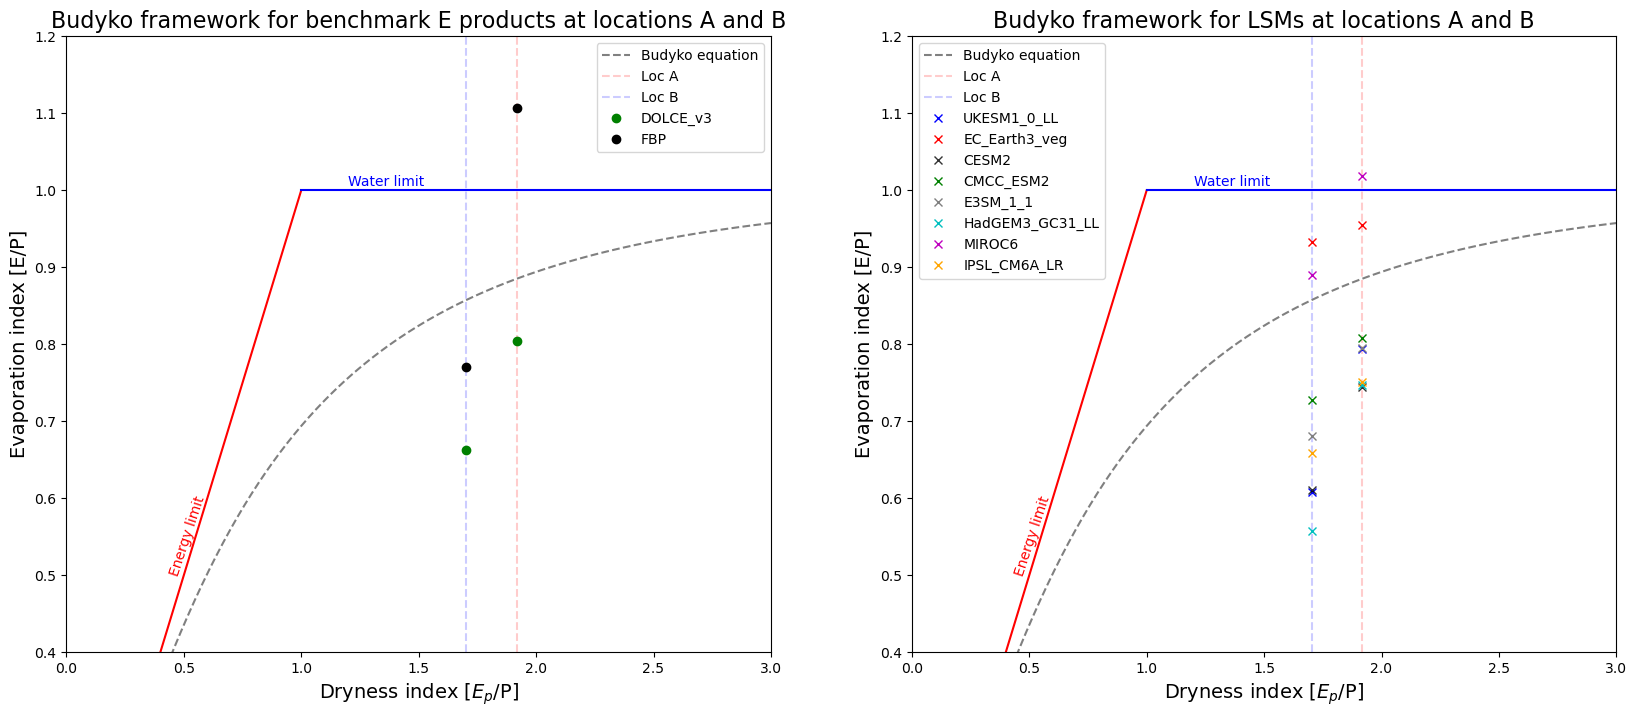

In [4]:
"""EP_0"""

EP_0_EB = np.zeros(365)
EP_0_WA = np.zeros(365)

for i in range(365):
    EP_0_EB[i] = EP_HS(i+1 , -14 , Tmax_EB[i , : , :].mean()-273.15 , Tmin_EB[i , : , :].mean()-273.15 , Tav_EB[i , : , :].mean()-273.15) * (365.2 / 12)
    EP_0_WA[i] = EP_HS(i+1 , 10 , Tmax_WA[i , : , :].mean()-273.15 , Tmin_WA[i , : , :].mean()-273.15 , Tav_WA[i , : , :].mean()-273.15) * (365.2 / 12)

"""Budyko framework"""

x = [0 , 1]
y = [0 , 1]
y2 = [1 , 1]
x2 = [1 , 3]

plt.figure(figsize = (20 , 8))

plt.subplot(121)

plt.plot(x , y , 'r')
plt.plot(x2 , y2 , 'blue')
plt.text(1.2 , 1.005 , 'Water limit' , color = 'blue')
plt.text(0.43 , 0.5 , 'Energy limit' , rotation = 71.5 , color = 'red')
#plt.grid()



"""Budyko equation"""

xb = np.linspace(0.001 , 3 , 100)
yb = np.sqrt(xb * (1 - np.exp(-xb))*np.tanh(xb**-1))
plt.plot(xb , yb , label = 'Budyko equation' , linestyle = 'dashed' , color = 'grey')
plt.axvline(x = EP_0_EB.mean()/P_mean_EB.mean() , ymin = 0 , ymax = 1 , color = 'red' , label = 'Loc A' , alpha = 0.2 , linestyle = 'dashed')
plt.axvline(x = EP_0_WA.mean()/P_mean_WA.mean() , ymin = 0 , ymax = 1 , color = 'blue' , label = 'Loc B' , alpha = 0.2 , linestyle = 'dashed')
#plt.grid()

"""Models"""



plt.plot(EP_0_EB.mean()/P_mean_EB.mean() , ET_mean_DOLCE_v3_EB.mean()/ P_mean_EB.mean() , 'go' , label = 'DOLCE_v3')
plt.plot(EP_0_EB.mean()/P_mean_EB.mean() , ET_mean_FBP_EB.mean()/ P_mean_EB.mean() , 'ko' , label = 'FBP')

plt.plot(EP_0_WA.mean()/P_mean_WA.mean() , ET_mean_DOLCE_v3_WA.mean()/ P_mean_WA.mean() , 'go')
plt.plot(EP_0_WA.mean()/P_mean_WA.mean() , ET_mean_FBP_WA.mean()/ P_mean_WA.mean() , 'ko')



plt.xlabel(r'Dryness index [$E_p$/P]' , fontsize = 14)
plt.ylabel('Evaporation index [E/P]' , fontsize = 14)
plt.title('Budyko framework for benchmark E products at locations A and B' , fontsize = 16)
#plt.grid()
plt.legend()
plt.xlim(0 , 3)
plt.ylim(0.4 , 1.2)

plt.subplot(122)
plt.plot(x , y , 'r')
plt.plot(x2 , y2 , 'blue')
plt.text(1.2 , 1.005 , 'Water limit' , color = 'blue')
plt.text(0.43 , 0.5 , 'Energy limit' , rotation = 71.5 , color = 'red')

xb = np.linspace(0.001 , 3 , 100)
yb = np.sqrt(xb * (1 - np.exp(-xb))*np.tanh(xb**-1))
plt.plot(xb , yb , label = 'Budyko equation' , linestyle = 'dashed' , color = 'grey')
plt.axvline(x = EP_0_EB.mean()/P_mean_EB.mean() , ymin = 0 , ymax = 1 , color = 'red' , label = 'Loc A' , alpha = 0.2 , linestyle = 'dashed')
plt.axvline(x = EP_0_WA.mean()/P_mean_WA.mean() , ymin = 0 , ymax = 1 , color = 'blue' , label = 'Loc B' , alpha = 0.2 , linestyle = 'dashed')

plt.plot(EP_0_EB.mean()/P_mean_EB.mean() , ET_mean_UKESM1_0_LL_EB.mean()/ P_mean_EB.mean() , 'bx' , label = 'UKESM1_0_LL')
plt.plot(EP_0_EB.mean()/P_mean_EB.mean() , ET_mean_EC_Earth3_veg_EB.mean()/ P_mean_EB.mean() , 'rx' , label = 'EC_Earth3_veg')
plt.plot(EP_0_EB.mean()/P_mean_EB.mean() , ET_mean_CESM2_EB.mean()/ P_mean_EB.mean() , 'kx' , label = 'CESM2' , alpha = 0.8)
plt.plot(EP_0_EB.mean()/P_mean_EB.mean() , ET_mean_CMCC_ESM2_EB.mean()/ P_mean_EB.mean() , linestyle = (0 , (0 , 100)) , marker = 'x' , color = 'green',  label = 'CMCC_ESM2')
plt.plot(EP_0_EB.mean()/P_mean_EB.mean() , ET_mean_E3SM_1_1_EB.mean()/ P_mean_EB.mean() ,linestyle = (0 , (0 , 100)), color = 'C7' , marker = 'x' , label = 'E3SM_1_1')
plt.plot(EP_0_EB.mean()/P_mean_EB.mean() , ET_mean_HadGEM3_GC31_LL_EB.mean()/ P_mean_EB.mean() , 'cx' , linestyle = (0 , (0 , 100))  , label = 'HadGEM3_GC31_LL')
plt.plot(EP_0_EB.mean()/P_mean_EB.mean() , ET_mean_MIROC6_EB.mean()/ P_mean_EB.mean() , 'mx' , label = 'MIROC6')
plt.plot(EP_0_EB.mean()/P_mean_EB.mean() , ET_mean_IPSL_CM6A_LR_EB.mean()/ P_mean_EB.mean() ,linestyle = (0 , (0 , 100)), color = 'orange' , marker = 'x' , label = 'IPSL_CM6A_LR')

plt.plot(EP_0_WA.mean()/P_mean_WA.mean() , ET_mean_UKESM1_0_LL_WA.mean()/ P_mean_WA.mean() , 'bx')
plt.plot(EP_0_WA.mean()/P_mean_WA.mean() , ET_mean_EC_Earth3_veg_WA.mean()/ P_mean_WA.mean() , 'rx')
plt.plot(EP_0_WA.mean()/P_mean_WA.mean() , ET_mean_CESM2_WA.mean()/ P_mean_WA.mean() , 'kx' , alpha = 0.8)
plt.plot(EP_0_WA.mean()/P_mean_WA.mean() , ET_mean_CMCC_ESM2_WA.mean()/ P_mean_WA.mean() , linestyle = (0 , (0 , 100)) , marker = 'x' , color = 'green')
plt.plot(EP_0_WA.mean()/P_mean_WA.mean() , ET_mean_E3SM_1_1_WA.mean()/ P_mean_WA.mean() ,linestyle = (0 , (0 , 100)), color = 'C7' , marker = 'x')
plt.plot(EP_0_WA.mean()/P_mean_WA.mean() , ET_mean_HadGEM3_GC31_LL_WA.mean()/ P_mean_WA.mean(), 'cx' , linestyle = (0 , (0 , 100)))
plt.plot(EP_0_WA.mean()/P_mean_WA.mean() , ET_mean_MIROC6_WA.mean()/ P_mean_WA.mean() , 'mx')
plt.plot(EP_0_WA.mean()/P_mean_WA.mean() , ET_mean_IPSL_CM6A_LR_WA.mean()/ P_mean_WA.mean() ,linestyle = (0 , (0 , 100)), color = 'orange' , marker = 'x')


plt.xlabel(r'Dryness index [$E_p$/P]' , fontsize = 14)
plt.ylabel(r'Evaporation index [E/P]' , fontsize = 14)
plt.title('Budyko framework for LSMs at locations A and B' , fontsize = 16)
#plt.grid()
plt.ylim(0.4  , 1.2)
plt.xlim(0 , 3)
plt.legend();

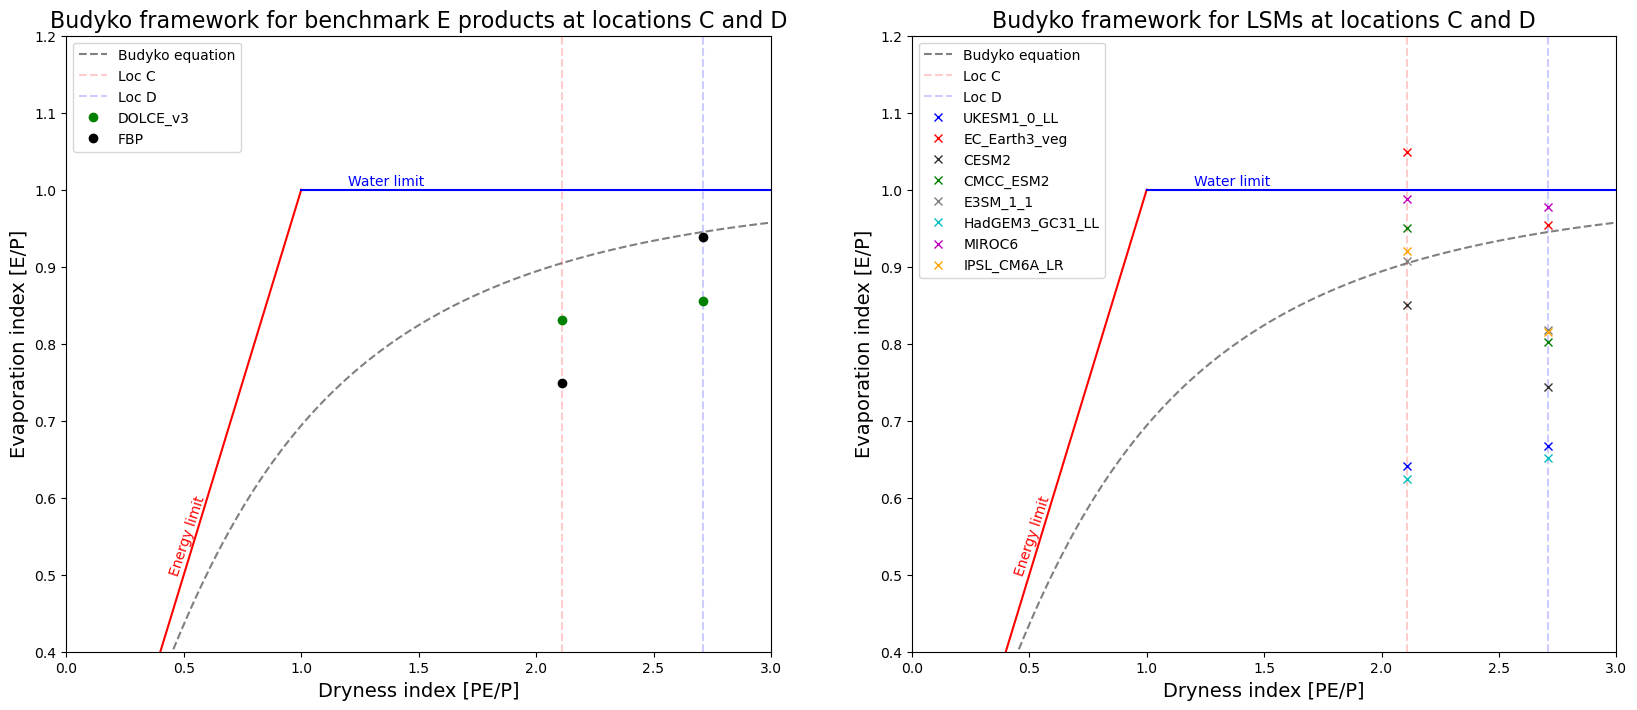

In [5]:
"""EP_0"""

EP_0_CU = np.zeros(365)
EP_0_SA = np.zeros(365)

for i in range(365):
    EP_0_CU[i] = EP_HS(i+1 , -14 , Tmax_CU[i , : , :].mean()-273.15 , Tmin_CU[i , : , :].mean()-273.15 , Tav_CU[i , : , :].mean()-273.15) * (365.2 / 12)
    EP_0_SA[i] = EP_HS(i+1 , 10 , Tmax_SA[i , : , :].mean()-273.15 , Tmin_SA[i , : , :].mean()-273.15 , Tav_SA[i , : , :].mean()-273.15) * (365.2 / 12)

"""Budyko framework"""

x = [0 , 1]
y = [0 , 1]
y2 = [1 , 1]
x2 = [1 , 3]

plt.figure(figsize = (20 , 8))

plt.subplot(121)
plt.plot(x , y , 'r')
plt.plot(x2 , y2 , 'blue')
plt.text(1.2 , 1.005 , 'Water limit' , color = 'blue')
plt.text(0.43 , 0.5 , 'Energy limit' , rotation = 71.5 , color = 'red')
plt.grid()


"""Budyko equation"""

xb = np.linspace(0.001 , 3 , 100)
yb = np.sqrt(xb * (1 - np.exp(-xb))*np.tanh(xb**-1))
plt.plot(xb , yb , label = 'Budyko equation' , linestyle = 'dashed' , color = 'grey')
plt.axvline(x = EP_0_CU.mean()/P_mean_CU.mean() , ymin = 0 , ymax = 1 , color = 'red' , label = 'Loc C' , alpha = 0.2 , linestyle = 'dashed')
plt.axvline(x = EP_0_SA.mean()/P_mean_SA.mean() , ymin = 0 , ymax = 1 , color = 'blue' , label = 'Loc D' , alpha = 0.2 , linestyle = 'dashed')
plt.grid()

"""Models"""

plt.plot(EP_0_CU.mean()/P_mean_CU.mean() , ET_mean_DOLCE_v3_CU.mean()/ P_mean_CU.mean() , 'go' , label = 'DOLCE_v3')
plt.plot(EP_0_CU.mean()/P_mean_CU.mean() , ET_mean_FBP_CU.mean()/ P_mean_CU.mean() , 'ko' , label = 'FBP')

plt.plot(EP_0_SA.mean()/P_mean_SA.mean() , ET_mean_DOLCE_v3_SA.mean()/ P_mean_SA.mean() , 'go')
plt.plot(EP_0_SA.mean()/P_mean_SA.mean() , ET_mean_FBP_SA.mean()/ P_mean_SA.mean() , 'ko')



plt.xlabel('Dryness index [PE/P]', fontsize = 14)
plt.ylabel('Evaporation index [E/P]', fontsize = 14)
plt.title('Budyko framework for benchmark E products at locations C and D' , fontsize = 16)
#plt.grid()
plt.xlim(0 , 3)
plt.legend()
plt.ylim(0.4 , 1.2)

plt.subplot(122)

plt.text(1.2 , 1.005 , 'Water limit' , color = 'blue')
plt.text(0.43 , 0.5 , 'Energy limit' , rotation = 71.5 , color = 'red')


plt.plot(x , y , 'r')
plt.plot(x2 , y2 , 'blue')

xb = np.linspace(0.001 , 3 , 100)
yb = np.sqrt(xb * (1 - np.exp(-xb))*np.tanh(xb**-1))
plt.plot(xb , yb , label = 'Budyko equation' , linestyle = 'dashed' , color = 'grey')
plt.axvline(x = EP_0_CU.mean()/P_mean_CU.mean() , ymin = 0 , ymax = 1 , color = 'red' , label = 'Loc C' , alpha = 0.2 , linestyle = 'dashed')
plt.axvline(x = EP_0_SA.mean()/P_mean_SA.mean() , ymin = 0 , ymax = 1 , color = 'blue' , label = 'Loc D' , alpha = 0.2 , linestyle = 'dashed')

plt.plot(EP_0_CU.mean()/P_mean_CU.mean() , ET_mean_UKESM1_0_LL_CU.mean()/ P_mean_CU.mean() , 'bx' , label = 'UKESM1_0_LL')
plt.plot(EP_0_CU.mean()/P_mean_CU.mean() , ET_mean_EC_Earth3_veg_CU.mean()/ P_mean_CU.mean() , 'rx' , label = 'EC_Earth3_veg')
plt.plot(EP_0_CU.mean()/P_mean_CU.mean() , ET_mean_CESM2_CU.mean()/ P_mean_CU.mean() , 'kx' , label = 'CESM2' , alpha = 0.8)
plt.plot(EP_0_CU.mean()/P_mean_CU.mean() , ET_mean_CMCC_ESM2_CU.mean()/ P_mean_CU.mean() , linestyle = (0 , (0 , 100)) , marker = 'x' , color = 'green',  label = 'CMCC_ESM2')
plt.plot(EP_0_CU.mean()/P_mean_CU.mean() , ET_mean_E3SM_1_1_CU.mean()/ P_mean_CU.mean() ,linestyle = (0 , (0 , 100)), color = 'C7' , marker = 'x' , label = 'E3SM_1_1')
plt.plot(EP_0_CU.mean()/P_mean_CU.mean() , ET_mean_HadGEM3_GC31_LL_CU.mean()/ P_mean_CU.mean() , 'cx' , linestyle = (0 , (0 , 100))  , label = 'HadGEM3_GC31_LL')
plt.plot(EP_0_CU.mean()/P_mean_CU.mean() , ET_mean_MIROC6_CU.mean()/ P_mean_CU.mean() , 'mx' , label = 'MIROC6')
plt.plot(EP_0_CU.mean()/P_mean_CU.mean() , ET_mean_IPSL_CM6A_LR_CU.mean()/ P_mean_CU.mean() ,linestyle = (0 , (0 , 100)), color = 'orange' , marker = 'x' , label = 'IPSL_CM6A_LR')

plt.plot(EP_0_SA.mean()/P_mean_SA.mean() , ET_mean_UKESM1_0_LL_SA.mean()/ P_mean_SA.mean() , 'bx')
plt.plot(EP_0_SA.mean()/P_mean_SA.mean() , ET_mean_EC_Earth3_veg_SA.mean()/ P_mean_SA.mean() , 'rx')
plt.plot(EP_0_SA.mean()/P_mean_SA.mean() , ET_mean_CESM2_SA.mean()/ P_mean_SA.mean() , 'kx' , alpha = 0.8)
plt.plot(EP_0_SA.mean()/P_mean_SA.mean() , ET_mean_CMCC_ESM2_SA.mean()/ P_mean_SA.mean() , linestyle = (0 , (0 , 100)) , marker = 'x' , color = 'green')
plt.plot(EP_0_SA.mean()/P_mean_SA.mean() , ET_mean_E3SM_1_1_SA.mean()/ P_mean_SA.mean() ,linestyle = (0 , (0 , 100)), color = 'C7' , marker = 'x')
plt.plot(EP_0_SA.mean()/P_mean_SA.mean() , ET_mean_HadGEM3_GC31_LL_SA.mean()/ P_mean_SA.mean(), 'cx' , linestyle = (0 , (0 , 100)))
plt.plot(EP_0_SA.mean()/P_mean_SA.mean() , ET_mean_MIROC6_SA.mean()/ P_mean_SA.mean() , 'mx')
plt.plot(EP_0_SA.mean()/P_mean_SA.mean() , ET_mean_IPSL_CM6A_LR_SA.mean()/ P_mean_SA.mean() ,linestyle = (0 , (0 , 100)), color = 'orange' , marker = 'x')


plt.xlabel('Dryness index [PE/P]', fontsize = 14)
plt.ylabel('Evaporation index [E/P]', fontsize = 14)
plt.title('Budyko framework for LSMs at locations C and D', fontsize = 16)
#plt.grid()
plt.xlim(0 , 3)
plt.ylim(0.4  , 1.2)
plt.legend();

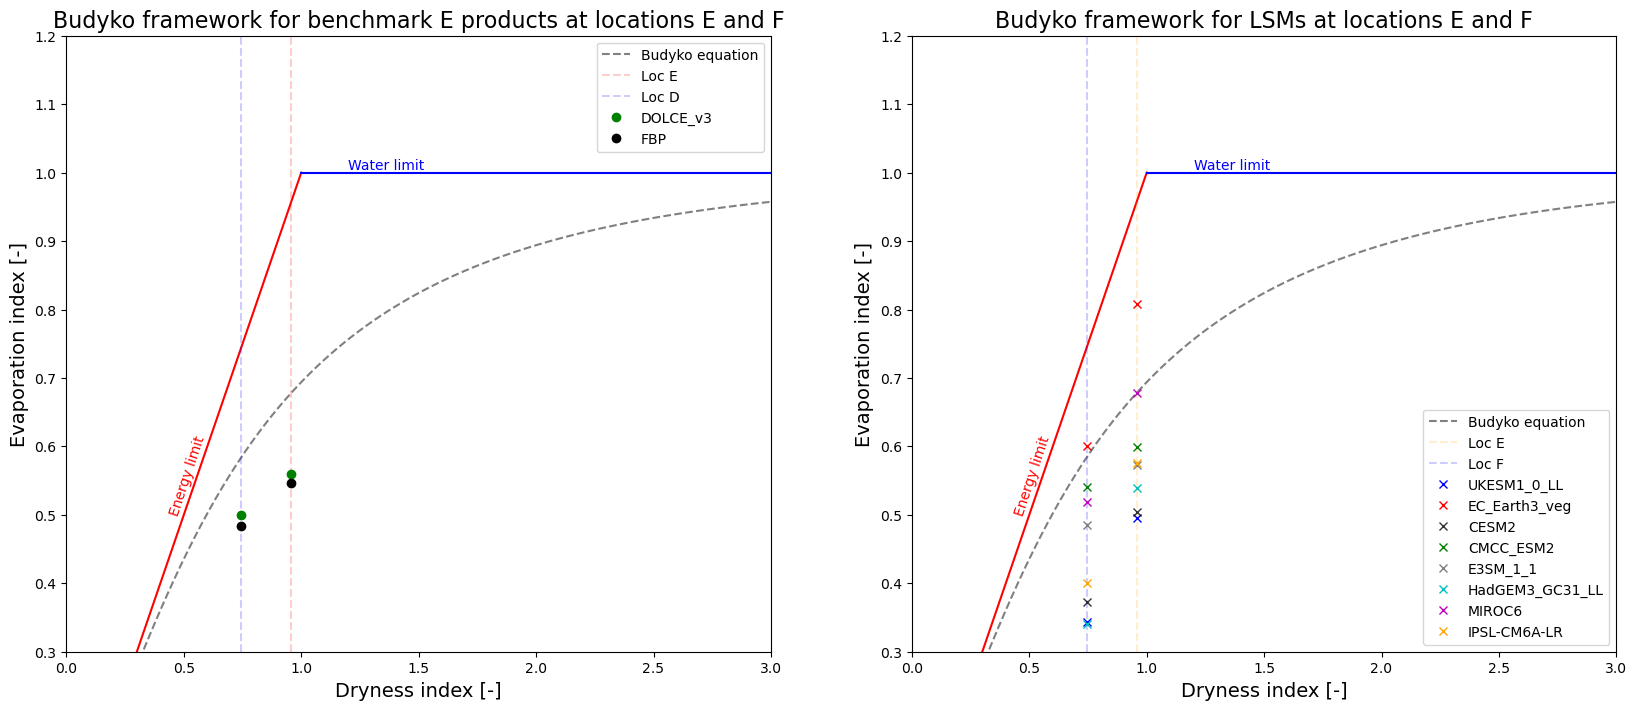

In [6]:
"""EP_0"""

EP_0_EU = np.zeros(365)
EP_0_EC = np.zeros(365)

for i in range(365):
    EP_0_EU[i] = EP_HS(i+1 , -14 , Tmax_EU[i , : , :].mean()-273.15 , Tmin_EU[i , : , :].mean()-273.15 , Tav_EU[i , : , :].mean()-273.15) * (365.2 / 12)
    EP_0_EC[i] = EP_HS(i+1 , 10 , Tmax_EC[i , : , :].mean()-273.15 , Tmin_EC[i , : , :].mean()-273.15 , Tav_EC[i , : , :].mean()-273.15) * (365.2 / 12)

"""Budyko framework"""

x = [0 , 1]
y = [0 , 1]
y2 = [1 , 1]
x2 = [1 , 3]

plt.figure(figsize = (20 , 8))

plt.subplot(121)
plt.plot(x , y , 'r')
plt.plot(x2 , y2 , 'blue')
plt.text(1.2 , 1.005 , 'Water limit' , color = 'blue')
plt.text(0.43 , 0.5 , 'Energy limit' , rotation = 71.5 , color = 'red')
plt.grid()


"""Budyko equation"""

xb = np.linspace(0.001 , 3 , 100)
yb = np.sqrt(xb * (1 - np.exp(-xb))*np.tanh(xb**-1))
plt.plot(xb , yb , label = 'Budyko equation' , linestyle = 'dashed' , color = 'grey')
plt.axvline(x = EP_0_EU.mean()/P_mean_EU.mean() , ymin = 0 , ymax = 1 , color = 'red' , label = 'Loc E' , alpha = 0.2 , linestyle = 'dashed')
plt.axvline(x = EP_0_EC.mean()/P_mean_EC.mean() , ymin = 0 , ymax = 1 , color = 'blue' , label = 'Loc D' , alpha = 0.2 , linestyle = 'dashed')
plt.grid()

"""Models"""

plt.plot(EP_0_EU.mean()/P_mean_EU.mean() , ET_mean_DOLCE_v3_EU.mean()/ P_mean_EU.mean() , 'go' , label = 'DOLCE_v3')
plt.plot(EP_0_EU.mean()/P_mean_EU.mean() , ET_mean_FBP_EU.mean()/ P_mean_EU.mean() , 'ko' , label = 'FBP')

plt.plot(EP_0_EC.mean()/P_mean_EC.mean() , ET_mean_DOLCE_v3_EC.mean()/ P_mean_EC.mean() , 'go')
plt.plot(EP_0_EC.mean()/P_mean_EC.mean() , ET_mean_FBP_EC.mean()/ P_mean_EC.mean() , 'ko')



plt.xlabel('Dryness index [-]', fontsize = 14)
plt.ylabel('Evaporation index [-]', fontsize = 14)
plt.title('Budyko framework for benchmark E products at locations E and F' , fontsize = 16)
#plt.grid()
plt.xlim(0 , 3)
plt.ylim(0.3  , 1.2)
plt.legend()

plt.subplot(122)

plt.plot(x , y , 'r')
plt.plot(x2 , y2 , 'blue')
plt.text(1.2 , 1.005 , 'Water limit' , color = 'blue')
plt.text(0.43 , 0.5 , 'Energy limit' , rotation = 71.5 , color = 'red')

xb = np.linspace(0.001 , 3 , 100)
yb = np.sqrt(xb * (1 - np.exp(-xb))*np.tanh(xb**-1))
plt.plot(xb , yb , label = 'Budyko equation' , linestyle = 'dashed' , color = 'grey')
plt.axvline(x = EP_0_EU.mean()/P_mean_EU.mean() , ymin = 0 , ymax = 1 , color = 'orange' , label = 'Loc E' , alpha = 0.2 , linestyle = 'dashed')
plt.axvline(x = EP_0_EC.mean()/P_mean_EC.mean() , ymin = 0 , ymax = 1 , color = 'blue' , label = 'Loc F' , alpha = 0.2 , linestyle = 'dashed')

plt.plot(EP_0_EU.mean()/P_mean_EU.mean() , ET_mean_UKESM1_0_LL_EU.mean()/ P_mean_EU.mean() , 'bx' , label = 'UKESM1_0_LL')
plt.plot(EP_0_EU.mean()/P_mean_EU.mean() , ET_mean_EC_Earth3_veg_EU.mean()/ P_mean_EU.mean() , 'rx' , label = 'EC_Earth3_veg')
plt.plot(EP_0_EU.mean()/P_mean_EU.mean() , ET_mean_CESM2_EU.mean()/ P_mean_EU.mean() , 'kx' , label = 'CESM2' , alpha = 0.8)
plt.plot(EP_0_EU.mean()/P_mean_EU.mean() , ET_mean_CMCC_ESM2_EU.mean()/ P_mean_EU.mean() , linestyle = (0 , (0 , 100)) , marker = 'x' , color = 'green',  label = 'CMCC_ESM2')
plt.plot(EP_0_EU.mean()/P_mean_EU.mean() , ET_mean_E3SM_1_1_EU.mean()/ P_mean_EU.mean() ,linestyle = (0 , (0 , 100)), color = 'C7' , marker = 'x' , label = 'E3SM_1_1')
plt.plot(EP_0_EU.mean()/P_mean_EU.mean() , ET_mean_HadGEM3_GC31_LL_EU.mean()/ P_mean_EU.mean() , 'cx' , linestyle = (0 , (0 , 100))  , label = 'HadGEM3_GC31_LL')
plt.plot(EP_0_EU.mean()/P_mean_EU.mean() , ET_mean_MIROC6_EU.mean()/ P_mean_EU.mean() , 'mx' , label = 'MIROC6')
plt.plot(EP_0_EU.mean()/P_mean_EU.mean() , ET_mean_IPSL_CM6A_LR_EU.mean()/ P_mean_EU.mean() ,linestyle = (0 , (0 , 100)), color = 'orange' , marker = 'x' , label = 'IPSL-CM6A-LR')

plt.plot(EP_0_EC.mean()/P_mean_EC.mean() , ET_mean_UKESM1_0_LL_EC.mean()/ P_mean_EC.mean() , 'bx')
plt.plot(EP_0_EC.mean()/P_mean_EC.mean() , ET_mean_EC_Earth3_veg_EC.mean()/ P_mean_EC.mean() , 'rx')
plt.plot(EP_0_EC.mean()/P_mean_EC.mean() , ET_mean_CESM2_EC.mean()/ P_mean_EC.mean() , 'kx' , alpha = 0.8)
plt.plot(EP_0_EC.mean()/P_mean_EC.mean() , ET_mean_CMCC_ESM2_EC.mean()/ P_mean_EC.mean() , linestyle = (0 , (0 , 100)) , marker = 'x' , color = 'green')
plt.plot(EP_0_EC.mean()/P_mean_EC.mean() , ET_mean_E3SM_1_1_EC.mean()/ P_mean_EC.mean() ,linestyle = (0 , (0 , 100)), color = 'C7' , marker = 'x')
plt.plot(EP_0_EC.mean()/P_mean_EC.mean() , ET_mean_HadGEM3_GC31_LL_EC.mean()/ P_mean_EC.mean(), 'cx' , linestyle = (0 , (0 , 100)))
plt.plot(EP_0_EC.mean()/P_mean_EC.mean() , ET_mean_MIROC6_EC.mean()/ P_mean_EC.mean() , 'mx')
plt.plot(EP_0_EC.mean()/P_mean_EC.mean() , ET_mean_IPSL_CM6A_LR_EC.mean()/ P_mean_EC.mean() ,linestyle = (0 , (0 , 100)), color = 'orange' , marker = 'x')


plt.xlabel('Dryness index [-]', fontsize = 14)
plt.ylabel('Evaporation index [-]', fontsize = 14)
plt.title('Budyko framework for LSMs at locations E and F', fontsize = 16)
#plt.grid()
plt.xlim(0 , 3)
plt.ylim(0.3  , 1.2)
plt.legend();

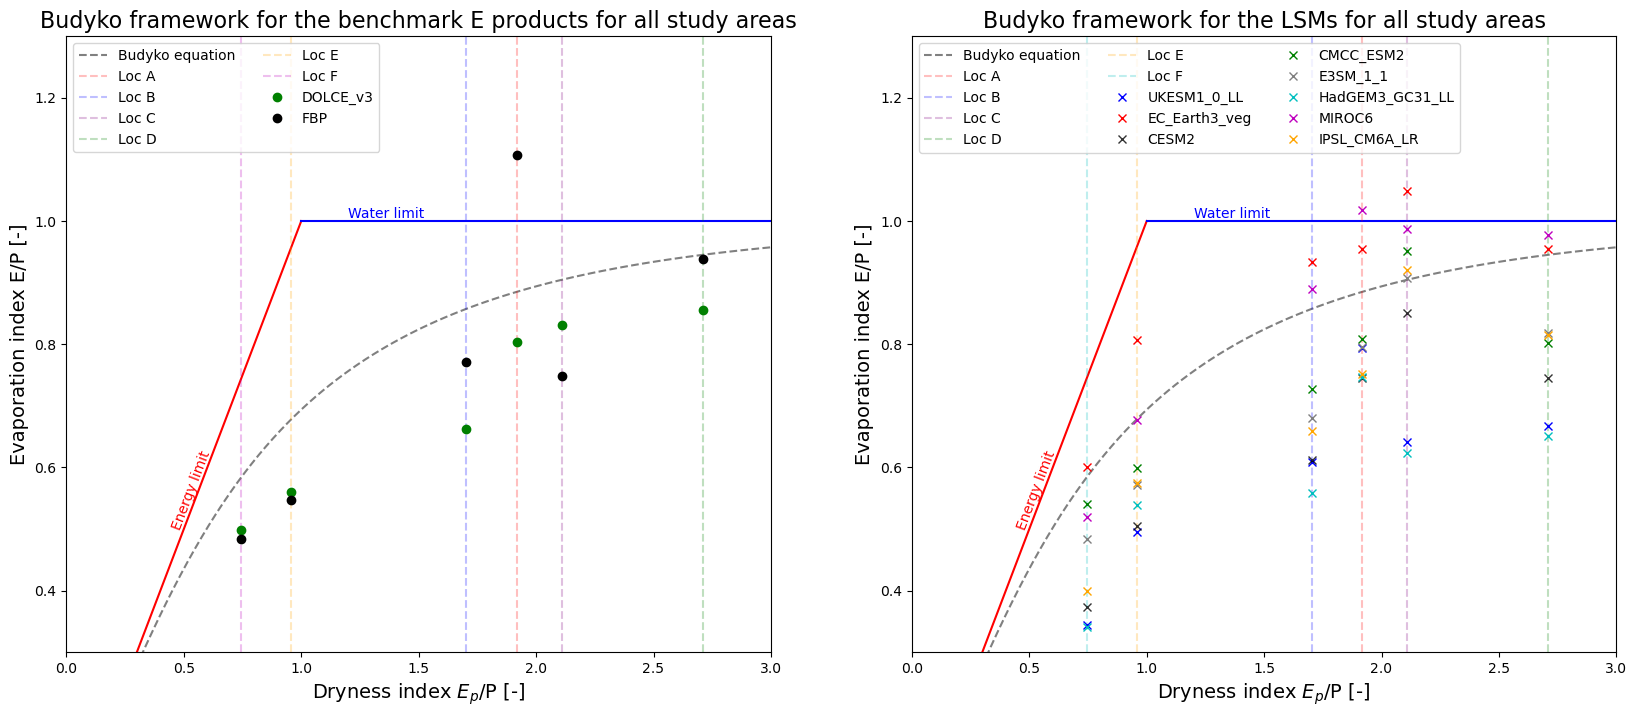

In [7]:
"""All locations together"""

plt.figure(figsize = (20 , 8))

plt.subplot(121)

plt.plot(x , y , 'r')
plt.plot(x2 , y2 , 'blue')
#plt.grid()

"""Budyko equation"""

xb = np.linspace(0.001 , 3 , 100)
yb = np.sqrt(xb * (1 - np.exp(-xb))*np.tanh(xb**-1))
plt.plot(xb , yb , label = 'Budyko equation' , linestyle = 'dashed' , color = 'grey')
plt.axvline(x = EP_0_EB.mean()/P_mean_EB.mean() , ymin = 0 , ymax = 1 , color = 'red' , label = 'Loc A' , alpha = 0.25 , linestyle = 'dashed')
plt.axvline(x = EP_0_WA.mean()/P_mean_WA.mean() , ymin = 0 , ymax = 1 , color = 'blue' , label = 'Loc B' , alpha = 0.25 , linestyle = 'dashed')
plt.axvline(x = EP_0_CU.mean()/P_mean_CU.mean() , ymin = 0 , ymax = 1 , color = 'purple' , label = 'Loc C' , alpha = 0.25 , linestyle = 'dashed')
plt.axvline(x = EP_0_SA.mean()/P_mean_SA.mean() , ymin = 0 , ymax = 1 , color = 'green' , label = 'Loc D' , alpha = 0.25 , linestyle = 'dashed')
plt.axvline(x = EP_0_EU.mean()/P_mean_EU.mean() , ymin = 0 , ymax = 1 , color = 'orange' , label = 'Loc E' , alpha = 0.25 , linestyle = 'dashed')
plt.axvline(x = EP_0_EC.mean()/P_mean_EC.mean() , ymin = 0 , ymax = 1 , color = 'm' , label = 'Loc F' , alpha = 0.25 , linestyle = 'dashed')

"""Models tropics water limited"""

plt.plot(EP_0_EB.mean()/P_mean_EB.mean() , ET_mean_DOLCE_v3_EB.mean()/ P_mean_EB.mean() , 'go' , label = 'DOLCE_v3')
plt.plot(EP_0_EB.mean()/P_mean_EB.mean() , ET_mean_FBP_EB.mean()/ P_mean_EB.mean() , 'ko' , label = 'FBP')

plt.plot(EP_0_WA.mean()/P_mean_WA.mean() , ET_mean_DOLCE_v3_WA.mean()/ P_mean_WA.mean() , 'go')
plt.plot(EP_0_WA.mean()/P_mean_WA.mean() , ET_mean_FBP_WA.mean()/ P_mean_WA.mean() , 'ko')

plt.xlabel(r'Dryness index $E_p$/P [-]' , fontsize = 14)
plt.ylabel('Evaporation index E/P [-]' , fontsize = 14)
plt.title('Budyko framework for the benchmark E products for all study areas' , fontsize = 16)
#plt.grid()
plt.legend(ncols = 2)
plt.xlim(0 , 3)
plt.ylim(0.3 , 1.3)

plt.subplot(122)
plt.plot(x , y , 'r')
plt.plot(x2 , y2 , 'blue')

xb = np.linspace(0.001 , 3 , 100)
yb = np.sqrt(xb * (1 - np.exp(-xb))*np.tanh(xb**-1))
plt.plot(xb , yb , label = 'Budyko equation' , linestyle = 'dashed' , color = 'grey')
plt.axvline(x = EP_0_EB.mean()/P_mean_EB.mean() , ymin = 0 , ymax = 1 , color = 'red' , label = 'Loc A' , alpha = 0.25 , linestyle = 'dashed')
plt.axvline(x = EP_0_WA.mean()/P_mean_WA.mean() , ymin = 0 , ymax = 1 , color = 'blue' , label = 'Loc B' , alpha = 0.25 , linestyle = 'dashed')
plt.axvline(x = EP_0_CU.mean()/P_mean_CU.mean() , ymin = 0 , ymax = 1 , color = 'purple' , label = 'Loc C' , alpha = 0.25 , linestyle = 'dashed')
plt.axvline(x = EP_0_SA.mean()/P_mean_SA.mean() , ymin = 0 , ymax = 1 , color = 'green' , label = 'Loc D' , alpha = 0.25 , linestyle = 'dashed')
plt.axvline(x = EP_0_EU.mean()/P_mean_EU.mean() , ymin = 0 , ymax = 1 , color = 'orange' , label = 'Loc E' , alpha = 0.25 , linestyle = 'dashed')
plt.axvline(x = EP_0_EC.mean()/P_mean_EC.mean() , ymin = 0 , ymax = 1 , color = 'c' , label = 'Loc F' , alpha = 0.25 , linestyle = 'dashed')

plt.plot(EP_0_EB.mean()/P_mean_EB.mean() , ET_mean_UKESM1_0_LL_EB.mean()/ P_mean_EB.mean() , 'bx' , label = 'UKESM1_0_LL')
plt.plot(EP_0_EB.mean()/P_mean_EB.mean() , ET_mean_EC_Earth3_veg_EB.mean()/ P_mean_EB.mean() , 'rx' , label = 'EC_Earth3_veg')
plt.plot(EP_0_EB.mean()/P_mean_EB.mean() , ET_mean_CESM2_EB.mean()/ P_mean_EB.mean() , 'kx' , label = 'CESM2' , alpha = 0.8)
plt.plot(EP_0_EB.mean()/P_mean_EB.mean() , ET_mean_CMCC_ESM2_EB.mean()/ P_mean_EB.mean() , linestyle = (0 , (0 , 100)) , marker = 'x' , color = 'green',  label = 'CMCC_ESM2')
plt.plot(EP_0_EB.mean()/P_mean_EB.mean() , ET_mean_E3SM_1_1_EB.mean()/ P_mean_EB.mean() ,linestyle = (0 , (0 , 100)), color = 'C7' , marker = 'x' , label = 'E3SM_1_1')
plt.plot(EP_0_EB.mean()/P_mean_EB.mean() , ET_mean_HadGEM3_GC31_LL_EB.mean()/ P_mean_EB.mean() , 'cx' , linestyle = (0 , (0 , 100))  , label = 'HadGEM3_GC31_LL')
plt.plot(EP_0_EB.mean()/P_mean_EB.mean() , ET_mean_MIROC6_EB.mean()/ P_mean_EB.mean() , 'mx' , label = 'MIROC6')
plt.plot(EP_0_EB.mean()/P_mean_EB.mean() , ET_mean_IPSL_CM6A_LR_EB.mean()/ P_mean_EB.mean() ,linestyle = (0 , (0 , 100)), color = 'orange' , marker = 'x' , label = 'IPSL_CM6A_LR')

plt.plot(EP_0_WA.mean()/P_mean_WA.mean() , ET_mean_UKESM1_0_LL_WA.mean()/ P_mean_WA.mean() , 'bx')
plt.plot(EP_0_WA.mean()/P_mean_WA.mean() , ET_mean_EC_Earth3_veg_WA.mean()/ P_mean_WA.mean() , 'rx')
plt.plot(EP_0_WA.mean()/P_mean_WA.mean() , ET_mean_CESM2_WA.mean()/ P_mean_WA.mean() , 'kx' , alpha = 0.8)
plt.plot(EP_0_WA.mean()/P_mean_WA.mean() , ET_mean_CMCC_ESM2_WA.mean()/ P_mean_WA.mean() , linestyle = (0 , (0 , 100)) , marker = 'x' , color = 'green')
plt.plot(EP_0_WA.mean()/P_mean_WA.mean() , ET_mean_E3SM_1_1_WA.mean()/ P_mean_WA.mean() ,linestyle = (0 , (0 , 100)), color = 'C7' , marker = 'x')
plt.plot(EP_0_WA.mean()/P_mean_WA.mean() , ET_mean_HadGEM3_GC31_LL_WA.mean()/ P_mean_WA.mean(), 'cx' , linestyle = (0 , (0 , 100)))
plt.plot(EP_0_WA.mean()/P_mean_WA.mean() , ET_mean_MIROC6_WA.mean()/ P_mean_WA.mean() , 'mx')
plt.plot(EP_0_WA.mean()/P_mean_WA.mean() , ET_mean_IPSL_CM6A_LR_WA.mean()/ P_mean_WA.mean() ,linestyle = (0 , (0 , 100)), color = 'orange' , marker = 'x')


plt.xlabel(r'Dryness index $E_p$/P [-]' , fontsize = 14)
plt.ylabel(r'Evaporation index E/P [-]' , fontsize = 14)
plt.title('Budyko framework for the LSMs for all study areas' , fontsize = 16)
plt.ylim(0.3  , 1.3)
plt.xlim(0 , 3)

plt.subplot(121)

"""Models subtropics water limited"""

plt.plot(EP_0_CU.mean()/P_mean_CU.mean() , ET_mean_DOLCE_v3_CU.mean()/ P_mean_CU.mean() , 'go')
plt.plot(EP_0_CU.mean()/P_mean_CU.mean() , ET_mean_FBP_CU.mean()/ P_mean_CU.mean() , 'ko')

plt.plot(EP_0_SA.mean()/P_mean_SA.mean() , ET_mean_DOLCE_v3_SA.mean()/ P_mean_SA.mean() , 'go')
plt.plot(EP_0_SA.mean()/P_mean_SA.mean() , ET_mean_FBP_SA.mean()/ P_mean_SA.mean() , 'ko')

plt.subplot(122)

plt.plot(EP_0_CU.mean()/P_mean_CU.mean() , ET_mean_UKESM1_0_LL_CU.mean()/ P_mean_CU.mean() , 'bx')
plt.plot(EP_0_CU.mean()/P_mean_CU.mean() , ET_mean_EC_Earth3_veg_CU.mean()/ P_mean_CU.mean() , 'rx')
plt.plot(EP_0_CU.mean()/P_mean_CU.mean() , ET_mean_CESM2_CU.mean()/ P_mean_CU.mean() , 'kx' , alpha = 0.8)
plt.plot(EP_0_CU.mean()/P_mean_CU.mean() , ET_mean_CMCC_ESM2_CU.mean()/ P_mean_CU.mean() , linestyle = (0 , (0 , 100)) , marker = 'x' , color = 'green')
plt.plot(EP_0_CU.mean()/P_mean_CU.mean() , ET_mean_E3SM_1_1_CU.mean()/ P_mean_CU.mean() ,linestyle = (0 , (0 , 100)), color = 'C7' , marker = 'x')
plt.plot(EP_0_CU.mean()/P_mean_CU.mean() , ET_mean_HadGEM3_GC31_LL_CU.mean()/ P_mean_CU.mean() , 'cx' , linestyle = (0 , (0 , 100)))
plt.plot(EP_0_CU.mean()/P_mean_CU.mean() , ET_mean_MIROC6_CU.mean()/ P_mean_CU.mean() , 'mx')
plt.plot(EP_0_CU.mean()/P_mean_CU.mean() , ET_mean_IPSL_CM6A_LR_CU.mean()/ P_mean_CU.mean() ,linestyle = (0 , (0 , 100)), color = 'orange' , marker = 'x')

plt.plot(EP_0_SA.mean()/P_mean_SA.mean() , ET_mean_UKESM1_0_LL_SA.mean()/ P_mean_SA.mean() , 'bx')
plt.plot(EP_0_SA.mean()/P_mean_SA.mean() , ET_mean_EC_Earth3_veg_SA.mean()/ P_mean_SA.mean() , 'rx')
plt.plot(EP_0_SA.mean()/P_mean_SA.mean() , ET_mean_CESM2_SA.mean()/ P_mean_SA.mean() , 'kx' , alpha = 0.8)
plt.plot(EP_0_SA.mean()/P_mean_SA.mean() , ET_mean_CMCC_ESM2_SA.mean()/ P_mean_SA.mean() , linestyle = (0 , (0 , 100)) , marker = 'x' , color = 'green')
plt.plot(EP_0_SA.mean()/P_mean_SA.mean() , ET_mean_E3SM_1_1_SA.mean()/ P_mean_SA.mean() ,linestyle = (0 , (0 , 100)), color = 'C7' , marker = 'x')
plt.plot(EP_0_SA.mean()/P_mean_SA.mean() , ET_mean_HadGEM3_GC31_LL_SA.mean()/ P_mean_SA.mean(), 'cx' , linestyle = (0 , (0 , 100)))
plt.plot(EP_0_SA.mean()/P_mean_SA.mean() , ET_mean_MIROC6_SA.mean()/ P_mean_SA.mean() , 'mx')
plt.plot(EP_0_SA.mean()/P_mean_SA.mean() , ET_mean_IPSL_CM6A_LR_SA.mean()/ P_mean_SA.mean() ,linestyle = (0 , (0 , 100)), color = 'orange' , marker = 'x')

plt.legend(ncols = 2);

plt.subplot(121)

plt.text(1.2 , 1.005 , 'Water limit' , color = 'blue')
plt.text(0.44 , 0.5 , 'Energy limit' , rotation = 69 , color = 'red')

"""Models energy limited"""

plt.plot(EP_0_EU.mean()/P_mean_EU.mean() , ET_mean_DOLCE_v3_EU.mean()/ P_mean_EU.mean() , 'go')
plt.plot(EP_0_EU.mean()/P_mean_EU.mean() , ET_mean_FBP_EU.mean()/ P_mean_EU.mean() , 'ko')

plt.plot(EP_0_EC.mean()/P_mean_EC.mean() , ET_mean_DOLCE_v3_EC.mean()/ P_mean_EC.mean() , 'go')
plt.plot(EP_0_EC.mean()/P_mean_EC.mean() , ET_mean_FBP_EC.mean()/ P_mean_EC.mean() , 'ko')

plt.subplot(122)

plt.text(1.2 , 1.005 , 'Water limit' , color = 'blue')
plt.text(0.44 , 0.5 , 'Energy limit' , rotation = 69 , color = 'red')

plt.plot(EP_0_EU.mean()/P_mean_EU.mean() , ET_mean_UKESM1_0_LL_EU.mean()/ P_mean_EU.mean() , 'bx')
plt.plot(EP_0_EU.mean()/P_mean_EU.mean() , ET_mean_EC_Earth3_veg_EU.mean()/ P_mean_EU.mean() , 'rx')
plt.plot(EP_0_EU.mean()/P_mean_EU.mean() , ET_mean_CESM2_EU.mean()/ P_mean_EU.mean() , 'kx' , alpha = 0.8)
plt.plot(EP_0_EU.mean()/P_mean_EU.mean() , ET_mean_CMCC_ESM2_EU.mean()/ P_mean_EU.mean() , linestyle = (0 , (0 , 100)) , marker = 'x' , color = 'green')
plt.plot(EP_0_EU.mean()/P_mean_EU.mean() , ET_mean_E3SM_1_1_EU.mean()/ P_mean_EU.mean() ,linestyle = (0 , (0 , 100)), color = 'C7' , marker = 'x')
plt.plot(EP_0_EU.mean()/P_mean_EU.mean() , ET_mean_HadGEM3_GC31_LL_EU.mean()/ P_mean_EU.mean() , 'cx' , linestyle = (0 , (0 , 100)))
plt.plot(EP_0_EU.mean()/P_mean_EU.mean() , ET_mean_MIROC6_EU.mean()/ P_mean_EU.mean() , 'mx')
plt.plot(EP_0_EU.mean()/P_mean_EU.mean() , ET_mean_IPSL_CM6A_LR_EU.mean()/ P_mean_EU.mean() ,linestyle = (0 , (0 , 100)), color = 'orange' , marker = 'x')

plt.plot(EP_0_EC.mean()/P_mean_EC.mean() , ET_mean_UKESM1_0_LL_EC.mean()/ P_mean_EC.mean() , 'bx')
plt.plot(EP_0_EC.mean()/P_mean_EC.mean() , ET_mean_EC_Earth3_veg_EC.mean()/ P_mean_EC.mean() , 'rx')
plt.plot(EP_0_EC.mean()/P_mean_EC.mean() , ET_mean_CESM2_EC.mean()/ P_mean_EC.mean() , 'kx' , alpha = 0.8)
plt.plot(EP_0_EC.mean()/P_mean_EC.mean() , ET_mean_CMCC_ESM2_EC.mean()/ P_mean_EC.mean() , linestyle = (0 , (0 , 100)) , marker = 'x' , color = 'green')
plt.plot(EP_0_EC.mean()/P_mean_EC.mean() , ET_mean_E3SM_1_1_EC.mean()/ P_mean_EC.mean() ,linestyle = (0 , (0 , 100)), color = 'C7' , marker = 'x')
plt.plot(EP_0_EC.mean()/P_mean_EC.mean() , ET_mean_HadGEM3_GC31_LL_EC.mean()/ P_mean_EC.mean(), 'cx' , linestyle = (0 , (0 , 100)))
plt.plot(EP_0_EC.mean()/P_mean_EC.mean() , ET_mean_MIROC6_EC.mean()/ P_mean_EC.mean() , 'mx')
plt.plot(EP_0_EC.mean()/P_mean_EC.mean() , ET_mean_IPSL_CM6A_LR_EC.mean()/ P_mean_EC.mean() ,linestyle = (0 , (0 , 100)), color = 'orange' , marker = 'x')

plt.legend(ncols = 3);

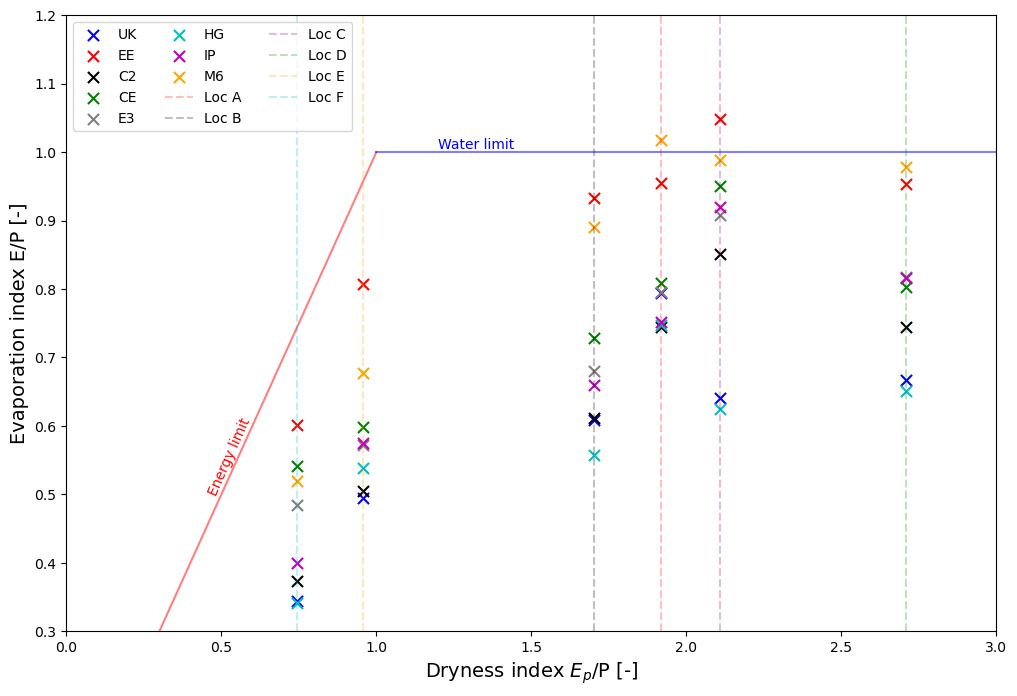

In [8]:
x_all = [EP_0_EC.mean()/P_mean_EC.mean(), EP_0_EU.mean()/P_mean_EU.mean() , EP_0_WA.mean()/P_mean_WA.mean() , 
     EP_0_EB.mean()/P_mean_EB.mean() , EP_0_CU.mean()/P_mean_CU.mean() , EP_0_SA.mean()/P_mean_SA.mean()]

colors = ['b' , 'r' , 'k' , 'g' , 'C7' , 'c' , 'm' , 'orange']
colors_b = ['C1' , 'C2']

#label = ['EE', 'IP', 'HG' , 'UK' , 'E3' , 'CE' , 'M6' , 'C2' , 'DO' , 'FB']
label = ['DO' , 'FB' , 'UK' , 'EE' , 'C2' , 'CE' , 'E3' , 'HG' , 'IP' , 'M6']

models_S = ['DOLCE_v3', 'FBP', 'UKESM1_0_LL', 'EC_Earth3_veg', 'CESM2', 'CMCC_ESM2', 'E3SM_1_1', 'HadGEM3_GC31_LL', 'IPSL_CM6A_LR', 'MIROC6']

for model in models_S:
    exec(f"{model} = np.zeros(6)") #Initialize all models with zeros
    exec(f"{model} = [ET_mean_{model}_EC.mean()/ P_mean_EC.mean(), ET_mean_{model}_EU.mean()/ P_mean_EU.mean() , ET_mean_{model}_WA.mean()/ P_mean_WA.mean() , ET_mean_{model}_EB.mean()/ P_mean_EB.mean() , ET_mean_{model}_CU.mean()/ P_mean_CU.mean() , ET_mean_{model}_SA.mean()/ P_mean_SA.mean()]")

Y = [DOLCE_v3 , FBP, UKESM1_0_LL , EC_Earth3_veg , CESM2 ,  CMCC_ESM2 , E3SM_1_1 , HadGEM3_GC31_LL , IPSL_CM6A_LR , MIROC6]

plt.figure(figsize = (12 , 8))

plt.plot(x , y , 'r' , alpha = 0.5)
plt.plot(x2 , y2 , 'blue' , alpha = 0.5)
plt.xlim(0 , 3)
plt.ylim(0.3 , 1.2)
plt.text(1.2 , 1.005 , 'Water limit' , color = 'blue')
plt.text(0.45 , 0.5 , 'Energy limit' , rotation = 66 , color = 'red')

xb = np.linspace(0.001 , 3 , 100)
yb = np.sqrt(xb * (1 - np.exp(-xb))*np.tanh(xb**-1))


#plt.plot(xb , yb * 0.9 , label = 'Budyko equation' , linestyle = 'dashed' , color = 'grey')


for i in range(len(Y) - 2):
    plt.scatter(x_all , Y[i + 2] , marker = 'x' , color = colors[i] , label = label[i+2] , s = 64)
    
plt.xlabel(r'Dryness index $E_p$/P [-]' , fontsize = 14)
plt.ylabel(r'Evaporation index E/P [-]' , fontsize = 14)
plt.axvline(x = EP_0_EB.mean()/P_mean_EB.mean() , ymin = 0 , ymax = 1 , color = 'red' , label = 'Loc A' , alpha = 0.25 , linestyle = 'dashed')
plt.axvline(x = EP_0_WA.mean()/P_mean_WA.mean() , ymin = 0 , ymax = 1 , color = 'k' , label = 'Loc B' , alpha = 0.25 , linestyle = 'dashed')
plt.axvline(x = EP_0_CU.mean()/P_mean_CU.mean() , ymin = 0 , ymax = 1 , color = 'purple' , label = 'Loc C' , alpha = 0.25 , linestyle = 'dashed')
plt.axvline(x = EP_0_SA.mean()/P_mean_SA.mean() , ymin = 0 , ymax = 1 , color = 'green' , label = 'Loc D' , alpha = 0.25 , linestyle = 'dashed')
plt.axvline(x = EP_0_EU.mean()/P_mean_EU.mean() , ymin = 0 , ymax = 1 , color = 'orange' , label = 'Loc E' , alpha = 0.25 , linestyle = 'dashed')
plt.axvline(x = EP_0_EC.mean()/P_mean_EC.mean() , ymin = 0 , ymax = 1 , color = 'c' , label = 'Loc F' , alpha = 0.25 , linestyle = 'dashed')


#plt.title('Budyko framework for the LSMs for all study areas' , fontsize = 16)
plt.legend(ncols = 3);

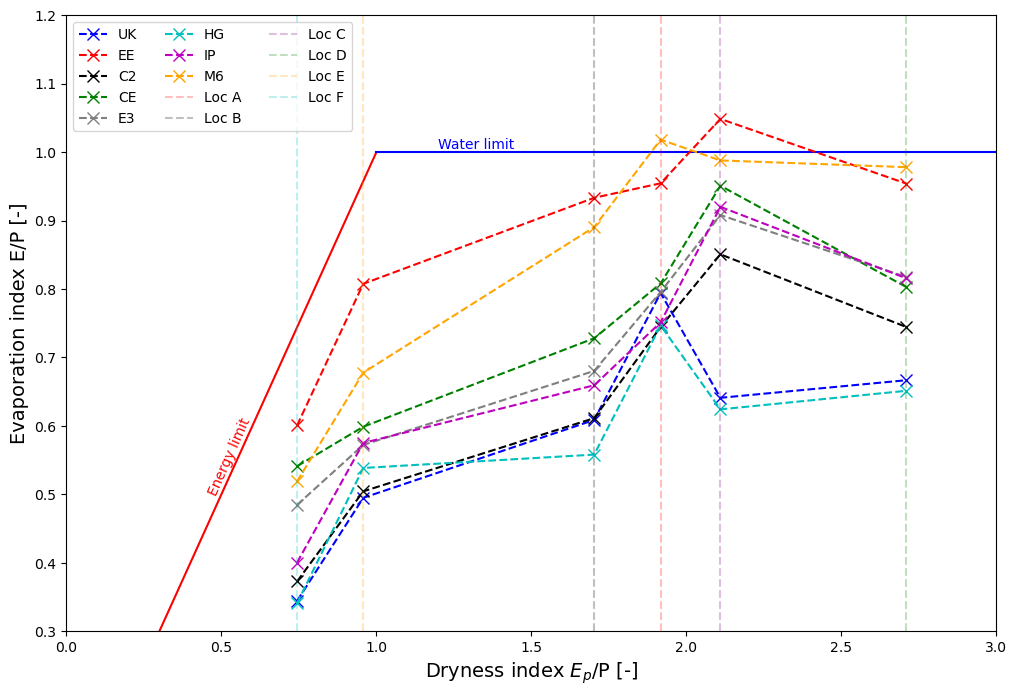

In [9]:
x_all = [EP_0_EC.mean()/P_mean_EC.mean(), EP_0_EU.mean()/P_mean_EU.mean() , EP_0_WA.mean()/P_mean_WA.mean() , 
     EP_0_EB.mean()/P_mean_EB.mean() , EP_0_CU.mean()/P_mean_CU.mean() , EP_0_SA.mean()/P_mean_SA.mean()]

colors = ['b' , 'r' , 'k' , 'g' , 'C7' , 'c' , 'm' , 'orange']
colors_b = ['C1' , 'C2']
label = ['DO' , 'FB' , 'UK' , 'EE' , 'C2' , 'CE' , 'E3' , 'HG' , 'IP' , 'M6']

models_S = ['DOLCE_v3', 'FBP', 'UKESM1_0_LL', 'EC_Earth3_veg', 'CESM2', 'CMCC_ESM2', 'E3SM_1_1', 'HadGEM3_GC31_LL', 'IPSL_CM6A_LR', 'MIROC6']

for model in models_S:
    exec(f"{model} = np.zeros(6)") #Initialize all models with zeros
    exec(f"{model} = [ET_mean_{model}_EC.mean()/ P_mean_EC.mean(), ET_mean_{model}_EU.mean()/ P_mean_EU.mean() , ET_mean_{model}_WA.mean()/ P_mean_WA.mean() , ET_mean_{model}_EB.mean()/ P_mean_EB.mean() , ET_mean_{model}_CU.mean()/ P_mean_CU.mean() , ET_mean_{model}_SA.mean()/ P_mean_SA.mean()]")

Y = [DOLCE_v3 , FBP, UKESM1_0_LL , EC_Earth3_veg , CESM2 ,  CMCC_ESM2 , E3SM_1_1 , HadGEM3_GC31_LL , IPSL_CM6A_LR , MIROC6]

plt.figure(figsize = (12 , 8))

plt.plot(x , y , 'r')
plt.plot(x2 , y2 , 'blue')
plt.xlim(0 , 3)
plt.ylim(0.3 , 1.2)
plt.text(1.2 , 1.005 , 'Water limit' , color = 'blue')
plt.text(0.45 , 0.5 , 'Energy limit' , rotation = 66 , color = 'red')

xb = np.linspace(0.001 , 3 , 100)
yb = np.sqrt(xb * (1 - np.exp(-xb))*np.tanh(xb**-1))

#plt.plot(xb , yb * 0.9 , label = 'Budyko equation' , linestyle = 'dashed' , color = 'grey')

for i in range(len(Y) - 2):
    plt.plot(x_all , Y[i + 2] , linestyle = 'dashed' , marker = 'x' , color = colors[i] , label = label[i + 2] , markersize = 8)

plt.xlabel(r'Dryness index $E_p$/P [-]' , fontsize = 14)
plt.ylabel(r'Evaporation index E/P [-]' , fontsize = 14)
plt.axvline(x = EP_0_EB.mean()/P_mean_EB.mean() , ymin = 0 , ymax = 1 , color = 'red' , label = 'Loc A' , alpha = 0.25 , linestyle = 'dashed')
plt.axvline(x = EP_0_WA.mean()/P_mean_WA.mean() , ymin = 0 , ymax = 1 , color = 'k' , label = 'Loc B' , alpha = 0.25 , linestyle = 'dashed')
plt.axvline(x = EP_0_CU.mean()/P_mean_CU.mean() , ymin = 0 , ymax = 1 , color = 'purple' , label = 'Loc C' , alpha = 0.25 , linestyle = 'dashed')
plt.axvline(x = EP_0_SA.mean()/P_mean_SA.mean() , ymin = 0 , ymax = 1 , color = 'green' , label = 'Loc D' , alpha = 0.25 , linestyle = 'dashed')
plt.axvline(x = EP_0_EU.mean()/P_mean_EU.mean() , ymin = 0 , ymax = 1 , color = 'orange' , label = 'Loc E' , alpha = 0.25 , linestyle = 'dashed')
plt.axvline(x = EP_0_EC.mean()/P_mean_EC.mean() , ymin = 0 , ymax = 1 , color = 'c' , label = 'Loc F' , alpha = 0.25 , linestyle = 'dashed')
#plt.title('Budyko framework for the LSMs for all study areas' , fontsize = 16)
plt.legend(ncols = 3 , loc = 'upper left');

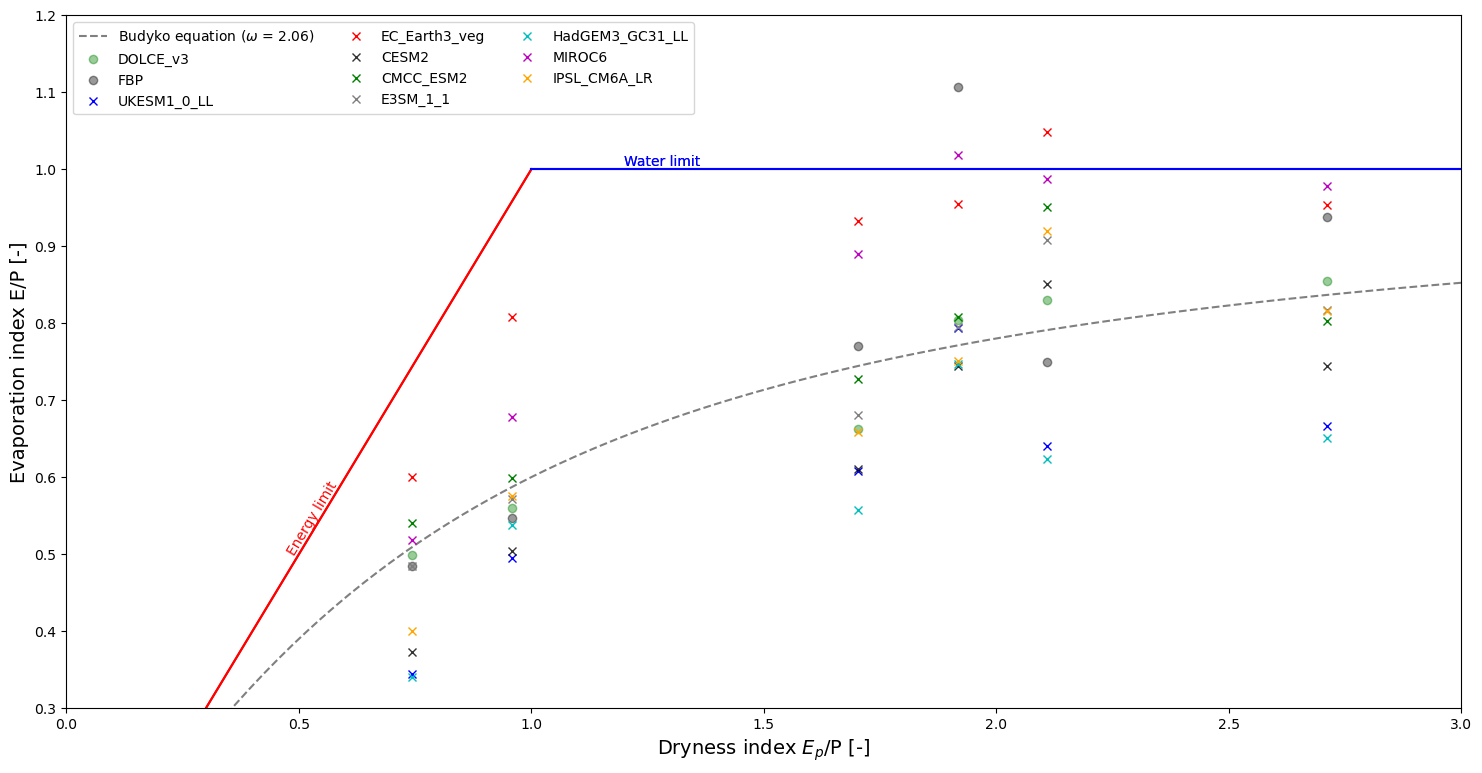

In [10]:
"""All locations together"""

plt.figure(figsize = (18 , 9))

plt.plot(x , y , 'r')
plt.plot(x2 , y2 , 'blue')
#plt.grid()

"""Budyko equation"""

def func(xb , om):
    return (1 + xb) - (1 + xb**om)**(1/om)

xdata = [EP_0_EB.mean()/P_mean_EB.mean(), EP_0_WA.mean()/P_mean_WA.mean() , EP_0_CU.mean()/P_mean_CU.mean() , EP_0_SA.mean()/P_mean_SA.mean() , EP_0_EU.mean()/P_mean_EU.mean() , EP_0_EC.mean()/P_mean_EC.mean(),
         EP_0_WA.mean()/P_mean_WA.mean() , EP_0_CU.mean()/P_mean_CU.mean() , EP_0_SA.mean()/P_mean_SA.mean() , EP_0_EU.mean()/P_mean_EU.mean() , EP_0_EC.mean()/P_mean_EC.mean()]
ydata = [float(ET_mean_DOLCE_v3_EB.mean()/ P_mean_EB.mean()) , float(ET_mean_DOLCE_v3_WA.mean()/ P_mean_WA.mean()) , float(ET_mean_DOLCE_v3_CU.mean()/ P_mean_CU.mean()) , float(ET_mean_DOLCE_v3_SA.mean()/ P_mean_SA.mean()) , float(ET_mean_DOLCE_v3_EU.mean()/ P_mean_EU.mean()) , float(ET_mean_DOLCE_v3_EC.mean()/ P_mean_EC.mean()),
         float(ET_mean_FBP_WA.mean()/ P_mean_WA.mean()) , float(ET_mean_FBP_CU.mean()/ P_mean_CU.mean()) , float(ET_mean_FBP_SA.mean()/ P_mean_SA.mean()) , float(ET_mean_FBP_EU.mean()/ P_mean_EU.mean()) , float(ET_mean_FBP_EC.mean()/ P_mean_EC.mean())]
popt , pcov  = curve_fit(func , xdata, ydata)

xb = np.linspace(0.001 , 3 , 100)
om = popt[0]
om_90 = om * 1.345
om_10 = om * 0.865
yb = (1 + xb) - (1 + xb**om)**(1/om)
#yb_90 = (1 + xb) - (1 + xb**om_90)**(1/om_90)
#yb_10 = (1 + xb) - (1 + xb**om_10)**(1/om_10)
plt.plot(xb , yb , label = 'Budyko equation ($\omega$ = 2.06)' , linestyle = 'dashed' , color = 'grey')
#plt.plot(xb , yb_90      , label = 'Reference data boundaries \n ($\omega$ = 2.77 and $\omega$ = 1.78)' , linestyle = 'dashed' , color = 'lightgreen')
#plt.plot(xb , yb_10      , linestyle = 'dashed' , color = 'lightgreen')
#plt.plot(xb , yb*1.1 , label = 'Budyko equation * 1.1' , linestyle = 'dashed' , color = 'lightgreen')
#plt.axvline(x = EP_0_EB.mean()/P_mean_EB.mean() , ymin = 0 , ymax = 1 , color = 'red' , label = 'Loc A' , alpha = 0.25 , linestyle = 'dashed')
#plt.axvline(x = EP_0_WA.mean()/P_mean_WA.mean() , ymin = 0 , ymax = 1 , color = 'blue' , label = 'Loc B' , alpha = 0.25 , linestyle = 'dashed')
#plt.axvline(x = EP_0_CU.mean()/P_mean_CU.mean() , ymin = 0 , ymax = 1 , color = 'purple' , label = 'Loc C' , alpha = 0.25 , linestyle = 'dashed')
#plt.axvline(x = EP_0_SA.mean()/P_mean_SA.mean() , ymin = 0 , ymax = 1 , color = 'green' , label = 'Loc D' , alpha = 0.25 , linestyle = 'dashed')
#plt.axvline(x = EP_0_EU.mean()/P_mean_EU.mean() , ymin = 0 , ymax = 1 , color = 'orange' , label = 'Loc E' , alpha = 0.25 , linestyle = 'dashed')
#plt.axvline(x = EP_0_EC.mean()/P_mean_EC.mean() , ymin = 0 , ymax = 1 , color = 'm' , label = 'Loc F' , alpha = 0.25 , linestyle = 'dashed')

"""Models tropics water limited"""

plt.plot(EP_0_EB.mean()/P_mean_EB.mean() , ET_mean_DOLCE_v3_EB.mean()/ P_mean_EB.mean() , 'go' , label = 'DOLCE_v3', alpha = 0.4)
plt.plot(EP_0_EB.mean()/P_mean_EB.mean() , ET_mean_FBP_EB.mean()/ P_mean_EB.mean() , 'ko' , label = 'FBP' , alpha = 0.4)

plt.plot(EP_0_WA.mean()/P_mean_WA.mean() , ET_mean_DOLCE_v3_WA.mean()/ P_mean_WA.mean() , 'go'  , alpha = 0.4)
plt.plot(EP_0_WA.mean()/P_mean_WA.mean() , ET_mean_FBP_WA.mean()/ P_mean_WA.mean() , 'ko'  , alpha = 0.4)

plt.xlabel(r'Dryness index $E_p$/P [-]' , fontsize = 14)
plt.ylabel('Evaporation index E/P [-]' , fontsize = 14)
#plt.title('Budyko framework for the benchmark E products for all study areas' , fontsize = 16)
#plt.grid()
plt.legend(ncols = 2)
#plt.xlim(0 , 3)
plt.ylim(0.3 , 1.3)

plt.plot(x , y , 'r')
plt.plot(x2 , y2 , 'blue')

plt.plot(EP_0_EB.mean()/P_mean_EB.mean() , ET_mean_UKESM1_0_LL_EB.mean()/ P_mean_EB.mean() , 'bx' , label = 'UKESM1_0_LL')
plt.plot(EP_0_EB.mean()/P_mean_EB.mean() , ET_mean_EC_Earth3_veg_EB.mean()/ P_mean_EB.mean() , 'rx' , label = 'EC_Earth3_veg')
plt.plot(EP_0_EB.mean()/P_mean_EB.mean() , ET_mean_CESM2_EB.mean()/ P_mean_EB.mean() , 'kx' , label = 'CESM2' , alpha = 0.8)
plt.plot(EP_0_EB.mean()/P_mean_EB.mean() , ET_mean_CMCC_ESM2_EB.mean()/ P_mean_EB.mean() , linestyle = (0 , (0 , 100)) , marker = 'x' , color = 'green',  label = 'CMCC_ESM2')
plt.plot(EP_0_EB.mean()/P_mean_EB.mean() , ET_mean_E3SM_1_1_EB.mean()/ P_mean_EB.mean() ,linestyle = (0 , (0 , 100)), color = 'C7' , marker = 'x' , label = 'E3SM_1_1')
plt.plot(EP_0_EB.mean()/P_mean_EB.mean() , ET_mean_HadGEM3_GC31_LL_EB.mean()/ P_mean_EB.mean() , 'cx' , linestyle = (0 , (0 , 100))  , label = 'HadGEM3_GC31_LL')
plt.plot(EP_0_EB.mean()/P_mean_EB.mean() , ET_mean_MIROC6_EB.mean()/ P_mean_EB.mean() , 'mx' , label = 'MIROC6')
plt.plot(EP_0_EB.mean()/P_mean_EB.mean() , ET_mean_IPSL_CM6A_LR_EB.mean()/ P_mean_EB.mean() ,linestyle = (0 , (0 , 100)), color = 'orange' , marker = 'x' , label = 'IPSL_CM6A_LR')

plt.plot(EP_0_WA.mean()/P_mean_WA.mean() , ET_mean_UKESM1_0_LL_WA.mean()/ P_mean_WA.mean() , 'bx')
plt.plot(EP_0_WA.mean()/P_mean_WA.mean() , ET_mean_EC_Earth3_veg_WA.mean()/ P_mean_WA.mean() , 'rx')
plt.plot(EP_0_WA.mean()/P_mean_WA.mean() , ET_mean_CESM2_WA.mean()/ P_mean_WA.mean() , 'kx' , alpha = 0.8)
plt.plot(EP_0_WA.mean()/P_mean_WA.mean() , ET_mean_CMCC_ESM2_WA.mean()/ P_mean_WA.mean() , linestyle = (0 , (0 , 100)) , marker = 'x' , color = 'green')
plt.plot(EP_0_WA.mean()/P_mean_WA.mean() , ET_mean_E3SM_1_1_WA.mean()/ P_mean_WA.mean() ,linestyle = (0 , (0 , 100)), color = 'C7' , marker = 'x')
plt.plot(EP_0_WA.mean()/P_mean_WA.mean() , ET_mean_HadGEM3_GC31_LL_WA.mean()/ P_mean_WA.mean(), 'cx' , linestyle = (0 , (0 , 100)))
plt.plot(EP_0_WA.mean()/P_mean_WA.mean() , ET_mean_MIROC6_WA.mean()/ P_mean_WA.mean() , 'mx')
plt.plot(EP_0_WA.mean()/P_mean_WA.mean() , ET_mean_IPSL_CM6A_LR_WA.mean()/ P_mean_WA.mean() ,linestyle = (0 , (0 , 100)), color = 'orange' , marker = 'x')


plt.xlabel(r'Dryness index $E_p$/P [-]' , fontsize = 14)
plt.ylabel(r'Evaporation index E/P [-]' , fontsize = 14)
#plt.title('Budyko framework for the LSMs for all study areas' , fontsize = 16)
plt.ylim(0.3  , 1.3)
#plt.xlim(0 , 3)

"""Models subtropics water limited"""

plt.plot(EP_0_CU.mean()/P_mean_CU.mean() , ET_mean_DOLCE_v3_CU.mean()/ P_mean_CU.mean() , 'go' , alpha = 0.4)
plt.plot(EP_0_CU.mean()/P_mean_CU.mean() , ET_mean_FBP_CU.mean()/ P_mean_CU.mean() , 'ko' , alpha = 0.4)

plt.plot(EP_0_SA.mean()/P_mean_SA.mean() , ET_mean_DOLCE_v3_SA.mean()/ P_mean_SA.mean() , 'go' , alpha = 0.4)
plt.plot(EP_0_SA.mean()/P_mean_SA.mean() , ET_mean_FBP_SA.mean()/ P_mean_SA.mean() , 'ko' , alpha = 0.4)

plt.plot(EP_0_CU.mean()/P_mean_CU.mean() , ET_mean_UKESM1_0_LL_CU.mean()/ P_mean_CU.mean() , 'bx')
plt.plot(EP_0_CU.mean()/P_mean_CU.mean() , ET_mean_EC_Earth3_veg_CU.mean()/ P_mean_CU.mean() , 'rx')
plt.plot(EP_0_CU.mean()/P_mean_CU.mean() , ET_mean_CESM2_CU.mean()/ P_mean_CU.mean() , 'kx' , alpha = 0.8)
plt.plot(EP_0_CU.mean()/P_mean_CU.mean() , ET_mean_CMCC_ESM2_CU.mean()/ P_mean_CU.mean() , linestyle = (0 , (0 , 100)) , marker = 'x' , color = 'green')
plt.plot(EP_0_CU.mean()/P_mean_CU.mean() , ET_mean_E3SM_1_1_CU.mean()/ P_mean_CU.mean() ,linestyle = (0 , (0 , 100)), color = 'C7' , marker = 'x')
plt.plot(EP_0_CU.mean()/P_mean_CU.mean() , ET_mean_HadGEM3_GC31_LL_CU.mean()/ P_mean_CU.mean() , 'cx' , linestyle = (0 , (0 , 100)))
plt.plot(EP_0_CU.mean()/P_mean_CU.mean() , ET_mean_MIROC6_CU.mean()/ P_mean_CU.mean() , 'mx')
plt.plot(EP_0_CU.mean()/P_mean_CU.mean() , ET_mean_IPSL_CM6A_LR_CU.mean()/ P_mean_CU.mean() ,linestyle = (0 , (0 , 100)), color = 'orange' , marker = 'x')

plt.plot(EP_0_SA.mean()/P_mean_SA.mean() , ET_mean_UKESM1_0_LL_SA.mean()/ P_mean_SA.mean() , 'bx')
plt.plot(EP_0_SA.mean()/P_mean_SA.mean() , ET_mean_EC_Earth3_veg_SA.mean()/ P_mean_SA.mean() , 'rx')
plt.plot(EP_0_SA.mean()/P_mean_SA.mean() , ET_mean_CESM2_SA.mean()/ P_mean_SA.mean() , 'kx' , alpha = 0.8)
plt.plot(EP_0_SA.mean()/P_mean_SA.mean() , ET_mean_CMCC_ESM2_SA.mean()/ P_mean_SA.mean() , linestyle = (0 , (0 , 100)) , marker = 'x' , color = 'green')
plt.plot(EP_0_SA.mean()/P_mean_SA.mean() , ET_mean_E3SM_1_1_SA.mean()/ P_mean_SA.mean() ,linestyle = (0 , (0 , 100)), color = 'C7' , marker = 'x')
plt.plot(EP_0_SA.mean()/P_mean_SA.mean() , ET_mean_HadGEM3_GC31_LL_SA.mean()/ P_mean_SA.mean(), 'cx' , linestyle = (0 , (0 , 100)))
plt.plot(EP_0_SA.mean()/P_mean_SA.mean() , ET_mean_MIROC6_SA.mean()/ P_mean_SA.mean() , 'mx')
plt.plot(EP_0_SA.mean()/P_mean_SA.mean() , ET_mean_IPSL_CM6A_LR_SA.mean()/ P_mean_SA.mean() ,linestyle = (0 , (0 , 100)), color = 'orange' , marker = 'x')

plt.legend(ncols = 2);

plt.text(1.2 , 1.005 , 'Water limit' , color = 'blue')

plt.ylim(0.3 , 1.2)
plt.xlim(0 , 3)

"""Models energy limited"""

plt.plot(EP_0_EU.mean()/P_mean_EU.mean() , ET_mean_DOLCE_v3_EU.mean()/ P_mean_EU.mean() , 'go' , alpha = 0.4)
plt.plot(EP_0_EU.mean()/P_mean_EU.mean() , ET_mean_FBP_EU.mean()/ P_mean_EU.mean() , 'ko' , alpha = 0.4)

plt.plot(EP_0_EC.mean()/P_mean_EC.mean() , ET_mean_DOLCE_v3_EC.mean()/ P_mean_EC.mean() , 'go' , alpha = 0.4)
plt.plot(EP_0_EC.mean()/P_mean_EC.mean() , ET_mean_FBP_EC.mean()/ P_mean_EC.mean() , 'ko' , alpha = 0.4)

plt.text(1.2 , 1.005 , 'Water limit' , color = 'blue')
plt.text(0.47 , 0.5 , 'Energy limit' , rotation = 59 , color = 'red')

plt.plot(EP_0_EU.mean()/P_mean_EU.mean() , ET_mean_UKESM1_0_LL_EU.mean()/ P_mean_EU.mean() , 'bx')
plt.plot(EP_0_EU.mean()/P_mean_EU.mean() , ET_mean_EC_Earth3_veg_EU.mean()/ P_mean_EU.mean() , 'rx')
plt.plot(EP_0_EU.mean()/P_mean_EU.mean() , ET_mean_CESM2_EU.mean()/ P_mean_EU.mean() , 'kx' , alpha = 0.8)
plt.plot(EP_0_EU.mean()/P_mean_EU.mean() , ET_mean_CMCC_ESM2_EU.mean()/ P_mean_EU.mean() , linestyle = (0 , (0 , 100)) , marker = 'x' , color = 'green')
plt.plot(EP_0_EU.mean()/P_mean_EU.mean() , ET_mean_E3SM_1_1_EU.mean()/ P_mean_EU.mean() ,linestyle = (0 , (0 , 100)), color = 'C7' , marker = 'x')
plt.plot(EP_0_EU.mean()/P_mean_EU.mean() , ET_mean_HadGEM3_GC31_LL_EU.mean()/ P_mean_EU.mean() , 'cx' , linestyle = (0 , (0 , 100)))
plt.plot(EP_0_EU.mean()/P_mean_EU.mean() , ET_mean_MIROC6_EU.mean()/ P_mean_EU.mean() , 'mx')
plt.plot(EP_0_EU.mean()/P_mean_EU.mean() , ET_mean_IPSL_CM6A_LR_EU.mean()/ P_mean_EU.mean() ,linestyle = (0 , (0 , 100)), color = 'orange' , marker = 'x')

plt.plot(EP_0_EC.mean()/P_mean_EC.mean() , ET_mean_UKESM1_0_LL_EC.mean()/ P_mean_EC.mean() , 'bx')
plt.plot(EP_0_EC.mean()/P_mean_EC.mean() , ET_mean_EC_Earth3_veg_EC.mean()/ P_mean_EC.mean() , 'rx')
plt.plot(EP_0_EC.mean()/P_mean_EC.mean() , ET_mean_CESM2_EC.mean()/ P_mean_EC.mean() , 'kx' , alpha = 0.8)
plt.plot(EP_0_EC.mean()/P_mean_EC.mean() , ET_mean_CMCC_ESM2_EC.mean()/ P_mean_EC.mean() , linestyle = (0 , (0 , 100)) , marker = 'x' , color = 'green')
plt.plot(EP_0_EC.mean()/P_mean_EC.mean() , ET_mean_E3SM_1_1_EC.mean()/ P_mean_EC.mean() ,linestyle = (0 , (0 , 100)), color = 'C7' , marker = 'x')
plt.plot(EP_0_EC.mean()/P_mean_EC.mean() , ET_mean_HadGEM3_GC31_LL_EC.mean()/ P_mean_EC.mean(), 'cx' , linestyle = (0 , (0 , 100)))
plt.plot(EP_0_EC.mean()/P_mean_EC.mean() , ET_mean_MIROC6_EC.mean()/ P_mean_EC.mean() , 'mx')
plt.plot(EP_0_EC.mean()/P_mean_EC.mean() , ET_mean_IPSL_CM6A_LR_EC.mean()/ P_mean_EC.mean() ,linestyle = (0 , (0 , 100)), color = 'orange' , marker = 'x')

plt.legend(ncols = 3);

In [11]:
#RMSE

Models = ['UKESM1_0_LL', 'EC_Earth3_veg', 'CESM2', 'CMCC_ESM2', 'E3SM_1_1', 'HadGEM3_GC31_LL', 'IPSL_CM6A_LR', 'MIROC6']

om = popt[0]
fitted_line = lambda x: (1 + x) - (1 + x**om)**(1/om)
rmse_L = np.zeros(8)

for model,i in zip(Models,np.arange(0 , 8 , 1)):
    #LSM datapoints
    exec(f'{model} = np.array([[EP_0_EB.mean()/P_mean_EB.mean(), ET_mean_{model}_EB.mean()/ P_mean_EB.mean()], [EP_0_WA.mean()/P_mean_WA.mean(), ET_mean_{model}_WA.mean()/ P_mean_WA.mean()], [EP_0_CU.mean()/P_mean_CU.mean(), ET_mean_{model}_CU.mean()/ P_mean_CU.mean()], [EP_0_SA.mean()/P_mean_SA.mean(), ET_mean_{model}_SA.mean()/ P_mean_SA.mean()],[EP_0_EU.mean()/P_mean_EU.mean(), ET_mean_{model}_EU.mean()/ P_mean_EU.mean()], [EP_0_EC.mean()/P_mean_EC.mean(), ET_mean_{model}_EC.mean()/ P_mean_EC.mean()]])')

    exec(f'x_values = {model}[:, 0]')
    predicted = fitted_line(x_values)
    exec(f'observed_y_values = {model}[:, 1]')
    differences = observed_y_values - predicted

    # Square each difference and calculate the average
    squared_differences = differences ** 2
    mse = np.mean(squared_differences)

    # Take the square root of the average squared differences to get RMSE
    rmse = np.sqrt(mse)
    rmse_L[i] = rmse

    print(f'Root Mean Squared Error {model}: {rmse:.2f}')

Root Mean Squared Error UKESM1_0_LL: 0.13
Root Mean Squared Error EC_Earth3_veg: 0.19
Root Mean Squared Error CESM2: 0.10
Root Mean Squared Error CMCC_ESM2: 0.07
Root Mean Squared Error E3SM_1_1: 0.06
Root Mean Squared Error HadGEM3_GC31_LL: 0.15
Root Mean Squared Error IPSL_CM6A_LR: 0.08
Root Mean Squared Error MIROC6: 0.16


In [13]:
print('WA')
print((ET_mean_EC_Earth3_veg_WA.mean()/ P_mean_WA.mean() - ET_mean_HadGEM3_GC31_LL_WA.mean()/ P_mean_WA.mean()))
print('EC')
print((ET_mean_EC_Earth3_veg_EC.mean()/ P_mean_EC.mean() - ET_mean_HadGEM3_GC31_LL_EC.mean()/ P_mean_EC.mean()))
print('EU')
print((ET_mean_EC_Earth3_veg_EU.mean()/ P_mean_EU.mean() - ET_mean_UKESM1_0_LL_EU.mean()/ P_mean_EU.mean()))
print('CU')
print((ET_mean_EC_Earth3_veg_CU.mean()/ P_mean_CU.mean() - ET_mean_HadGEM3_GC31_LL_CU.mean()/ P_mean_CU.mean()))
print('EB')
print((ET_mean_MIROC6_EB.mean()/ P_mean_EB.mean() - ET_mean_HadGEM3_GC31_LL_EB.mean()/ P_mean_EB.mean()))
print('SA')
print((ET_mean_MIROC6_SA.mean()/ P_mean_SA.mean() - ET_mean_HadGEM3_GC31_LL_SA.mean()/ P_mean_SA.mean()))

print('The average difference between the highest and the lowest value is equal to:' , (0.38 + 0.26 + 0.31 + 0.42 + 0.27 + 0.33)/6)

WA
<xarray.DataArray 'evspsbl' ()>
array(0.37521386)
EC
<xarray.DataArray 'evspsbl' ()>
array(0.25989039)
EU
<xarray.DataArray 'evspsbl' ()>
array(0.31266742)
CU
<xarray.DataArray 'evspsbl' ()>
array(0.42433967)
EB
<xarray.DataArray 'evspsbl' ()>
array(0.2715169)
SA
<xarray.DataArray 'evspsbl' ()>
array(0.32666315)
The average difference between the highest and the lowest value is equal to: 0.3283333333333333


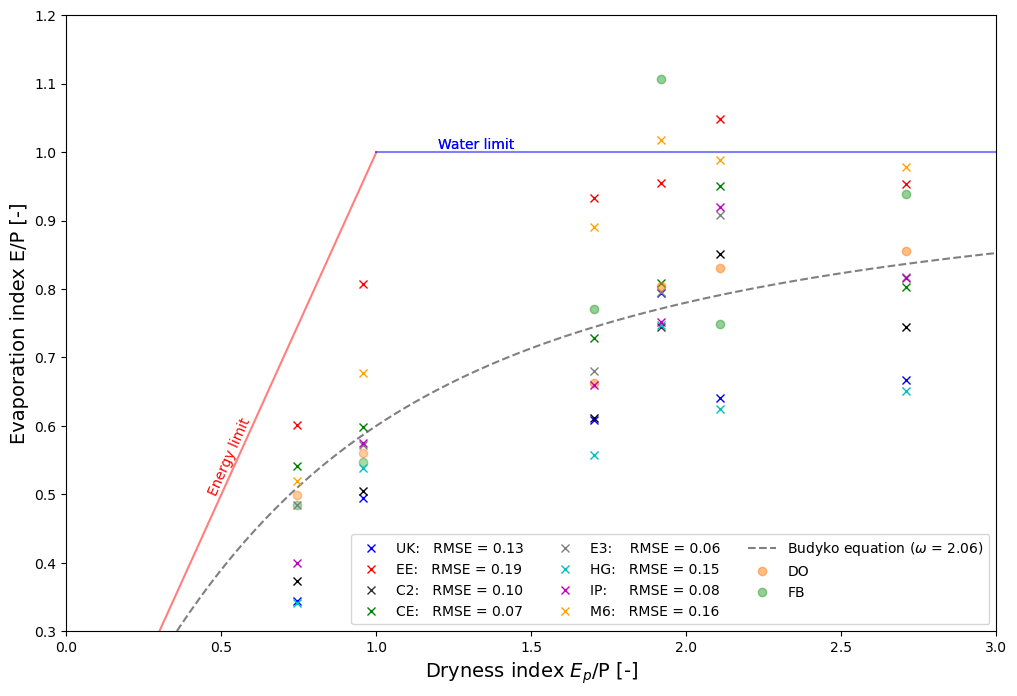

In [30]:
"""All locations together"""

plt.figure(figsize = (12 , 8))

#plt.grid()

"""Budyko equation"""

def func(xb , om):
    return (1 + xb) - (1 + xb**om)**(1/om)

xdata = [EP_0_EB.mean()/P_mean_EB.mean(), EP_0_WA.mean()/P_mean_WA.mean() , EP_0_CU.mean()/P_mean_CU.mean() , EP_0_SA.mean()/P_mean_SA.mean() , EP_0_EU.mean()/P_mean_EU.mean() , EP_0_EC.mean()/P_mean_EC.mean(),
         EP_0_WA.mean()/P_mean_WA.mean() , EP_0_CU.mean()/P_mean_CU.mean() , EP_0_SA.mean()/P_mean_SA.mean() , EP_0_EU.mean()/P_mean_EU.mean() , EP_0_EC.mean()/P_mean_EC.mean()]
ydata = [float(ET_mean_DOLCE_v3_EB.mean()/ P_mean_EB.mean()) , float(ET_mean_DOLCE_v3_WA.mean()/ P_mean_WA.mean()) , float(ET_mean_DOLCE_v3_CU.mean()/ P_mean_CU.mean()) , float(ET_mean_DOLCE_v3_SA.mean()/ P_mean_SA.mean()) , float(ET_mean_DOLCE_v3_EU.mean()/ P_mean_EU.mean()) , float(ET_mean_DOLCE_v3_EC.mean()/ P_mean_EC.mean()),
         float(ET_mean_FBP_WA.mean()/ P_mean_WA.mean()) , float(ET_mean_FBP_CU.mean()/ P_mean_CU.mean()) , float(ET_mean_FBP_SA.mean()/ P_mean_SA.mean()) , float(ET_mean_FBP_EU.mean()/ P_mean_EU.mean()) , float(ET_mean_FBP_EC.mean()/ P_mean_EC.mean())]
popt , pcov  = curve_fit(func , xdata, ydata)

xb = np.linspace(0.001 , 3 , 100)
om = popt[0]
om_90 = om * 1.345
om_10 = om * 0.865
yb = (1 + xb) - (1 + xb**om)**(1/om)
#yb_90 = (1 + xb) - (1 + xb**om_90)**(1/om_90)
#yb_10 = (1 + xb) - (1 + xb**om_10)**(1/om_10)


plt.xlabel(r'Dryness index $E_p$/P [-]' , fontsize = 14)
plt.ylabel('Evaporation index E/P [-]' , fontsize = 14)
#plt.title('Budyko framework for the benchmark E products for all study areas' , fontsize = 16)
#plt.grid()
#plt.legend(ncols = 2)
#plt.xlim(0 , 3)
plt.ylim(0.3 , 1.3)

plt.plot(x , y , 'r' , alpha =0.5)
plt.plot(x2 , y2 , 'blue' , alpha = 0.5)

plt.plot(EP_0_EB.mean()/P_mean_EB.mean() , ET_mean_UKESM1_0_LL_EB.mean()/ P_mean_EB.mean() , 'bx' , label = f'UK:   RMSE = {rmse_L[0]:.2f}')
plt.plot(EP_0_EB.mean()/P_mean_EB.mean() , ET_mean_EC_Earth3_veg_EB.mean()/ P_mean_EB.mean() , 'rx' , label = f'EE:   RMSE = {rmse_L[1]:.2f}')
plt.plot(EP_0_EB.mean()/P_mean_EB.mean() , ET_mean_CESM2_EB.mean()/ P_mean_EB.mean() , 'kx' , label = f'C2:   RMSE = {rmse_L[2]:.2f}' , alpha = 0.8)
plt.plot(EP_0_EB.mean()/P_mean_EB.mean() , ET_mean_CMCC_ESM2_EB.mean()/ P_mean_EB.mean() , linestyle = (0 , (0 , 100)) , marker = 'x' , color = 'green',  label = f'CE:   RMSE = {rmse_L[3]:.2f}')
plt.plot(EP_0_EB.mean()/P_mean_EB.mean() , ET_mean_E3SM_1_1_EB.mean()/ P_mean_EB.mean() ,linestyle = (0 , (0 , 100)), color = 'C7' , marker = 'x' , label = f'E3:    RMSE = {rmse_L[4]:.2f}')
plt.plot(EP_0_EB.mean()/P_mean_EB.mean() , ET_mean_HadGEM3_GC31_LL_EB.mean()/ P_mean_EB.mean() , 'cx' , linestyle = (0 , (0 , 100))  , label = f'HG:   RMSE = {rmse_L[5]:.2f}')
plt.plot(EP_0_EB.mean()/P_mean_EB.mean() , ET_mean_IPSL_CM6A_LR_EB.mean()/ P_mean_EB.mean() , 'mx' , label = f'IP:     RMSE = {rmse_L[6]:.2f}')
plt.plot(EP_0_EB.mean()/P_mean_EB.mean() , ET_mean_MIROC6_EB.mean()/ P_mean_EB.mean() , linestyle = (0 , (0 , 100)) , color = 'orange'  , marker = 'x' , label = f'M6:   RMSE = {rmse_L[7]:.2f}')


plt.plot(xb , yb , label = 'Budyko equation ($\omega$ = 2.06)' , linestyle = 'dashed' , color = 'grey')
#plt.plot(xb , yb_90      , label = 'Reference data boundaries \n ($\omega$ = 2.77 and $\omega$ = 1.78)' , linestyle = 'dashed' , color = 'lightgreen')
#plt.plot(xb , yb_10      , linestyle = 'dashed' , color = 'lightgreen')
#plt.plot(xb , yb*1.1 , label = 'Budyko equation * 1.1' , linestyle = 'dashed' , color = 'lightgreen')
#plt.axvline(x = EP_0_EB.mean()/P_mean_EB.mean() , ymin = 0 , ymax = 1 , color = 'red' , label = 'Loc A' , alpha = 0.25 , linestyle = 'dashed')
#plt.axvline(x = EP_0_WA.mean()/P_mean_WA.mean() , ymin = 0 , ymax = 1 , color = 'blue' , label = 'Loc B' , alpha = 0.25 , linestyle = 'dashed')
#plt.axvline(x = EP_0_CU.mean()/P_mean_CU.mean() , ymin = 0 , ymax = 1 , color = 'purple' , label = 'Loc C' , alpha = 0.25 , linestyle = 'dashed')
#plt.axvline(x = EP_0_SA.mean()/P_mean_SA.mean() , ymin = 0 , ymax = 1 , color = 'green' , label = 'Loc D' , alpha = 0.25 , linestyle = 'dashed')
#plt.axvline(x = EP_0_EU.mean()/P_mean_EU.mean() , ymin = 0 , ymax = 1 , color = 'orange' , label = 'Loc E' , alpha = 0.25 , linestyle = 'dashed')
#plt.axvline(x = EP_0_EC.mean()/P_mean_EC.mean() , ymin = 0 , ymax = 1 , color = 'm' , label = 'Loc F' , alpha = 0.25 , linestyle = 'dashed')

"""Models tropics water limited"""

plt.plot(EP_0_EB.mean()/P_mean_EB.mean() , ET_mean_DOLCE_v3_EB.mean()/ P_mean_EB.mean() , 'C1o' , alpha = 0.5)
plt.plot(EP_0_EB.mean()/P_mean_EB.mean() , ET_mean_FBP_EB.mean()/ P_mean_EB.mean() , 'C2o' , alpha = 0.5)

plt.plot(EP_0_WA.mean()/P_mean_WA.mean() , ET_mean_DOLCE_v3_WA.mean()/ P_mean_WA.mean() , 'C1o'  , label = 'DO', alpha = 0.5)
plt.plot(EP_0_WA.mean()/P_mean_WA.mean() , ET_mean_FBP_WA.mean()/ P_mean_WA.mean() , 'C2o'  , label = 'FB', alpha = 0.5)

plt.plot(EP_0_WA.mean()/P_mean_WA.mean() , ET_mean_UKESM1_0_LL_WA.mean()/ P_mean_WA.mean() , 'bx')
plt.plot(EP_0_WA.mean()/P_mean_WA.mean() , ET_mean_EC_Earth3_veg_WA.mean()/ P_mean_WA.mean() , 'rx')
plt.plot(EP_0_WA.mean()/P_mean_WA.mean() , ET_mean_CESM2_WA.mean()/ P_mean_WA.mean() , 'kx')
plt.plot(EP_0_WA.mean()/P_mean_WA.mean() , ET_mean_CMCC_ESM2_WA.mean()/ P_mean_WA.mean() , linestyle = (0 , (0 , 100)) , marker = 'x' , color = 'green')
plt.plot(EP_0_WA.mean()/P_mean_WA.mean() , ET_mean_E3SM_1_1_WA.mean()/ P_mean_WA.mean() ,linestyle = (0 , (0 , 100)), color = 'C7' , marker = 'x')
plt.plot(EP_0_WA.mean()/P_mean_WA.mean() , ET_mean_HadGEM3_GC31_LL_WA.mean()/ P_mean_WA.mean() , 'cx' , linestyle = (0 , (0 , 100)))
plt.plot(EP_0_WA.mean()/P_mean_WA.mean() , ET_mean_MIROC6_WA.mean()/ P_mean_WA.mean() , linestyle = (0 , (0 , 100)) , color = 'orange'  , marker = 'x')
plt.plot(EP_0_WA.mean()/P_mean_WA.mean() , ET_mean_IPSL_CM6A_LR_WA.mean()/ P_mean_WA.mean() , 'mx')



plt.xlabel(r'Dryness index $E_p$/P [-]' , fontsize = 14)
plt.ylabel(r'Evaporation index E/P [-]' , fontsize = 14)
#plt.title('Budyko framework for the LSMs for all study areas' , fontsize = 16)
plt.ylim(0.3  , 1.3)
#plt.xlim(0 , 3)

"""Models subtropics water limited"""

plt.plot(EP_0_CU.mean()/P_mean_CU.mean() , ET_mean_DOLCE_v3_CU.mean()/ P_mean_CU.mean() , 'C1o' , alpha = 0.5)
plt.plot(EP_0_CU.mean()/P_mean_CU.mean() , ET_mean_FBP_CU.mean()/ P_mean_CU.mean() , 'C2o' , alpha = 0.5)

plt.plot(EP_0_SA.mean()/P_mean_SA.mean() , ET_mean_DOLCE_v3_SA.mean()/ P_mean_SA.mean() , 'C1o' , alpha = 0.5)
plt.plot(EP_0_SA.mean()/P_mean_SA.mean() , ET_mean_FBP_SA.mean()/ P_mean_SA.mean() , 'C2o' , alpha = 0.5)

plt.plot(EP_0_CU.mean()/P_mean_CU.mean() , ET_mean_UKESM1_0_LL_CU.mean()/ P_mean_CU.mean() , 'bx')
plt.plot(EP_0_CU.mean()/P_mean_CU.mean() , ET_mean_EC_Earth3_veg_CU.mean()/ P_mean_CU.mean() , 'rx')
plt.plot(EP_0_CU.mean()/P_mean_CU.mean() , ET_mean_CESM2_CU.mean()/ P_mean_CU.mean() , 'kx')
plt.plot(EP_0_CU.mean()/P_mean_CU.mean() , ET_mean_CMCC_ESM2_CU.mean()/ P_mean_CU.mean() , linestyle = (0 , (0 , 100)) , marker = 'x' , color = 'green')
plt.plot(EP_0_CU.mean()/P_mean_CU.mean() , ET_mean_E3SM_1_1_CU.mean()/ P_mean_CU.mean() ,linestyle = (0 , (0 , 100)), color = 'C7' , marker = 'x')
plt.plot(EP_0_CU.mean()/P_mean_CU.mean() , ET_mean_HadGEM3_GC31_LL_CU.mean()/ P_mean_CU.mean() , 'cx' , linestyle = (0 , (0 , 100)))
plt.plot(EP_0_CU.mean()/P_mean_CU.mean() , ET_mean_MIROC6_CU.mean()/ P_mean_CU.mean() , linestyle = (0 , (0 , 100)) , color = 'orange'  , marker = 'x')
plt.plot(EP_0_CU.mean()/P_mean_CU.mean() , ET_mean_IPSL_CM6A_LR_CU.mean()/ P_mean_CU.mean() , 'mx')

plt.plot(EP_0_SA.mean()/P_mean_SA.mean() , ET_mean_UKESM1_0_LL_SA.mean()/ P_mean_SA.mean() , 'bx')
plt.plot(EP_0_SA.mean()/P_mean_SA.mean() , ET_mean_EC_Earth3_veg_SA.mean()/ P_mean_SA.mean() , 'rx')
plt.plot(EP_0_SA.mean()/P_mean_SA.mean() , ET_mean_CESM2_SA.mean()/ P_mean_SA.mean() , 'kx')
plt.plot(EP_0_SA.mean()/P_mean_SA.mean() , ET_mean_CMCC_ESM2_SA.mean()/ P_mean_SA.mean() , linestyle = (0 , (0 , 100)) , marker = 'x' , color = 'green')
plt.plot(EP_0_SA.mean()/P_mean_SA.mean() , ET_mean_E3SM_1_1_SA.mean()/ P_mean_SA.mean() ,linestyle = (0 , (0 , 100)), color = 'C7' , marker = 'x')
plt.plot(EP_0_SA.mean()/P_mean_SA.mean() , ET_mean_HadGEM3_GC31_LL_SA.mean()/ P_mean_SA.mean() , 'cx' , linestyle = (0 , (0 , 100)))
plt.plot(EP_0_SA.mean()/P_mean_SA.mean() , ET_mean_MIROC6_SA.mean()/ P_mean_SA.mean() , linestyle = (0 , (0 , 100)) , color = 'orange'  , marker = 'x')
plt.plot(EP_0_SA.mean()/P_mean_SA.mean() , ET_mean_IPSL_CM6A_LR_SA.mean()/ P_mean_SA.mean() , 'mx')

plt.legend(ncols = 2);

plt.text(1.2 , 1.005 , 'Water limit' , color = 'blue')

plt.ylim(0.3 , 1.2)
plt.xlim(0 , 3)

"""Models energy limited"""

plt.plot(EP_0_EU.mean()/P_mean_EU.mean() , ET_mean_DOLCE_v3_EU.mean()/ P_mean_EU.mean() , 'C1o' , alpha = 0.4)
plt.plot(EP_0_EU.mean()/P_mean_EU.mean() , ET_mean_FBP_EU.mean()/ P_mean_EU.mean() , 'C2o' , alpha = 0.4)

plt.plot(EP_0_EC.mean()/P_mean_EC.mean() , ET_mean_DOLCE_v3_EC.mean()/ P_mean_EC.mean() , 'C1o' , alpha = 0.4)
plt.plot(EP_0_EC.mean()/P_mean_EC.mean() , ET_mean_FBP_EC.mean()/ P_mean_EC.mean() , 'C2o' , alpha = 0.4)

plt.text(1.2 , 1.005 , 'Water limit' , color = 'blue')
plt.text(0.45 , 0.5 , 'Energy limit' , rotation = 66 , color = 'red')

plt.plot(EP_0_EU.mean()/P_mean_EU.mean() , ET_mean_UKESM1_0_LL_EU.mean()/ P_mean_EU.mean() , 'bx')
plt.plot(EP_0_EU.mean()/P_mean_EU.mean() , ET_mean_EC_Earth3_veg_EU.mean()/ P_mean_EU.mean() , 'rx')
plt.plot(EP_0_EU.mean()/P_mean_EU.mean() , ET_mean_CESM2_EU.mean()/ P_mean_EU.mean() , 'kx')
plt.plot(EP_0_EU.mean()/P_mean_EU.mean() , ET_mean_CMCC_ESM2_EU.mean()/ P_mean_EU.mean() , linestyle = (0 , (0 , 100)) , marker = 'x' , color = 'green')
plt.plot(EP_0_EU.mean()/P_mean_EU.mean() , ET_mean_E3SM_1_1_EU.mean()/ P_mean_EU.mean() ,linestyle = (0 , (0 , 100)), color = 'C7' , marker = 'x')
plt.plot(EP_0_EU.mean()/P_mean_EU.mean() , ET_mean_HadGEM3_GC31_LL_EU.mean()/ P_mean_EU.mean() , 'cx' , linestyle = (0 , (0 , 100)))
plt.plot(EP_0_EU.mean()/P_mean_EU.mean() , ET_mean_MIROC6_EU.mean()/ P_mean_EU.mean() , linestyle = (0 , (0 , 100)) , color = 'orange'  , marker = 'x')
plt.plot(EP_0_EU.mean()/P_mean_EU.mean() , ET_mean_IPSL_CM6A_LR_EU.mean()/ P_mean_EU.mean() , 'mx')

plt.plot(EP_0_EC.mean()/P_mean_EC.mean() , ET_mean_UKESM1_0_LL_EC.mean()/ P_mean_EC.mean() , 'bx')
plt.plot(EP_0_EC.mean()/P_mean_EC.mean() , ET_mean_EC_Earth3_veg_EC.mean()/ P_mean_EC.mean() , 'rx')
plt.plot(EP_0_EC.mean()/P_mean_EC.mean() , ET_mean_CESM2_EC.mean()/ P_mean_EC.mean() , 'kx')
plt.plot(EP_0_EC.mean()/P_mean_EC.mean() , ET_mean_CMCC_ESM2_EC.mean()/ P_mean_EC.mean() , linestyle = (0 , (0 , 100)) , marker = 'x' , color = 'green')
plt.plot(EP_0_EC.mean()/P_mean_EC.mean() , ET_mean_E3SM_1_1_EC.mean()/ P_mean_EC.mean() ,linestyle = (0 , (0 , 100)), color = 'C7' , marker = 'x')
plt.plot(EP_0_EC.mean()/P_mean_EC.mean() , ET_mean_HadGEM3_GC31_LL_EC.mean()/ P_mean_EC.mean() , 'cx' , linestyle = (0 , (0 , 100)))
plt.plot(EP_0_EC.mean()/P_mean_EC.mean() , ET_mean_MIROC6_EC.mean()/ P_mean_EC.mean() , linestyle = (0 , (0 , 100)) , color = 'orange'  , marker = 'x')
plt.plot(EP_0_EC.mean()/P_mean_EC.mean() , ET_mean_IPSL_CM6A_LR_EC.mean()/ P_mean_EC.mean() , 'mx')

plt.legend(ncols = 3);